<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/main/Sibagatova%20Svetlana/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D0%BD%D0%B4%D0%B8%D0%B4%D0%B0%D1%82%D0%BE%D0%B2_%D0%BF%D0%BE_%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Блокнот по Стажировке по задаче "Оценка кадидатов по резюме".**

## Сборник необходимых для работы библиотек.

In [ ]:
# импортируем keras
from tensorflow import keras
from tensorflow.keras import layers

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate, ReLU, Dropout
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers.experimental import preprocessing

# Оптимизатор
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для подключения Гугл-диска
from google.colab import drive

# Работа со временем
import time

# Чтоб рисовать в колабе:
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences #

# подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

#from google.colab import files #  Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления

# Запись в файлы и чтение из файлов структур данных Python
# import pickle

#import os #Для работы с файлами


from IPython.display import clear_output

from imblearn.over_sampling import RandomOverSampler

from gensim.models import KeyedVectors  # для использования внешнего словоря частотности при подготовке текстовых данных

import tensorflow as tf

import nltk

# модуль для работы с корпусами текстовых данных из Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

#  модуль для работы с лемматизацией текста из NLTK
from nltk.stem import WordNetLemmatizer


## Исходные данные. Анализ

### Исследование Датасета

Скачаем базу для работы:

In [ ]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузим как файл .xlsx
data = pd.read_excel('/content/drive/MyDrive/Базы/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx')
data

Unnamed: 0         Дата отклика  \
0             0  2023-02-23 00:00:00   
1             1  2023-01-11 00:00:00   
2             2  2023-02-27 00:00:00   
3             3  2023-01-11 00:00:00   
4             4  2023-01-11 00:00:00   
..          ...                  ...   
574         577  2023-02-28 00:00:00   
575         578  2023-02-17 00:00:00   
576         579  2023-02-12 00:00:00   
577         580  2023-01-24 00:00:00   
578         581  2023-02-03 00:00:00   

                                  Пол, возраст            ЗП  \
0                                      Женщина   90 000 руб.   
1                                      Женщина    не указана   
2    Мужчина, 33 года, родился 23 августа 1989  150 000 руб.   
3     Мужчина, 32 года, родился 7 декабря 1990    не указана   
4     Мужчина, 26 лет, родился 21 февраля 1996  150 000 руб.   
..                                         ...           ...   
574      Мужчина, 24 года, родился 16 мая 1998   70 000 руб.   
575    Мужчина, 42 года, родился 27 марта 1980  100 000 руб.   
576   Мужчина, 39 лет, родился 19 октября 1983   80 000 руб.   
577     Женщина, 38 лет, родилась 14 июля 1984    не указана   
578    Женщина, 29 лет, родилась 21 марта 1993    не указана   

                              Ищет работу на должность  \
0                               Growth Product Manager   
1                               Growth Product Manager   
2                               Growth Product Manager   
3                               Growth Product Manager   
4                               Growth Product Manager   
..                                                 ...   
574                                    Project manager   
575                                    Project manager   
576                                    Project manager   
577  Product Manager в команду Финансового департам...   
578                       Product Manager в команду HR   

                                                 Город  \
0    Индонезия, Не готова к переезду, не готова к к...   
1    Москва, Готова к переезду, готова к командировкам   
2    Санкт-Петербург, Готов к переезду: Москва, гот...   
3    Москва, м. Молодежная, Хочу переехать, готов к...   
4         Пермь, Хочу переехать, готов к командировкам   
..                                                 ...   
574  Москва, м. Китай-город, Уфа, готов к редким ко...   
575    Уфа, Не готов к переезду, готов к командировкам   
576       Уфа, Готов к переезду, готов к командировкам   
577  Уфа, Не готова к переезду, готова к редким ком...   
578  Уфа, Хочу переехать: Австралия, Австрия, Ямайк...   

                                             Занятость  \
0    проектная работа, частичная занятость, полная ...   
1                                     полная занятость   
2    проектная работа, частичная занятость, полная ...   
3    стажировка, частичная занятость, полная занятость   
4    проектная работа, частичная занятость, полная ...   
..                                                 ...   
574                                   полная занятость   
575                                   полная занятость   
576                                   полная занятость   
577                                   полная занятость   
578  проектная работа, стажировка, частичная занято...   

                                                График  \
0                                     удаленная работа   
1         удаленная работа, гибкий график, полный день   
2         удаленная работа, гибкий график, полный день   
3         удаленная работа, гибкий график, полный день   
4         удаленная работа, гибкий график, полный день   
..                                                 ...   
574                                        полный день   
575                      удаленная работа, полный день   
576                                        полный день   
577       удаленная работа, гибкий график, полный день   
578  удаленная работа, гиб

Данные загружены и по нумерации строк видно, что фактически данных меньше: в XLS легко определить, что нет строк 541-543.
Посмотрим на данные, с которыми нам предстоит работать:

In [ ]:
#Читаем файл
data = pd.read_excel (r'/content/drive/MyDrive/Базы/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx', index_col=0)
#data.to_csv('DC.csv')
#data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']

In [ ]:
# Вывод количества резюме и числа признаков
print(data.shape)

data.head(3)

(579, 16)


Дата отклика                               Пол, возраст  \
0  2023-02-23 00:00:00                                    Женщина   
1  2023-01-11 00:00:00                                    Женщина   
2  2023-02-27 00:00:00  Мужчина, 33 года, родился 23 августа 1989   

             ЗП Ищет работу на должность  \
0   90 000 руб.   Growth Product Manager   
1    не указана   Growth Product Manager   
2  150 000 руб.   Growth Product Manager   

                                               Город  \
0  Индонезия, Не готова к переезду, не готова к к...   
1  Москва, Готова к переезду, готова к командировкам   
2  Санкт-Петербург, Готов к переезду: Москва, гот...   

                                           Занятость  \
0  проектная работа, частичная занятость, полная ...   
1                                   полная занятость   
2  проектная работа, частичная занятость, полная ...   

                                         График  \
0                              удаленная работа   
1  удаленная работа, гибкий график, полный день   
2  удаленная работа, гибкий график, полный день   

                          Опыт () Последнее/нынешное место работы  \
0   Опыт работы —5 лет 10 месяцев             PT MYBALI APP GROUP   
1  Опыт работы —11 лет 11 месяцев                   Банк Открытие   
2     Опыт работы —7 лет 2 месяца                       DIKIY LLC   

                  Последняя/нынешняя должность  \
0                         Менеджер по продукту   
1  Product owner трайб сбережения и инвестиции   
2                                                

          Выполняемые задачи на прошлых местах работ  \
0  Маркетинговые исследования\nИсследование рынка...   
1  Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...   
2  Запуск бренда и производства игристого кваса D...   

                                             Обо мне  \
0                                                NaN   
1                                                NaN   
2  Чем бы я ни занимался с 2014 года, когда решил...   

                                     Ключевые навыки  \
0  Анализ рынка\nУправление проектами\nProduct Ma...   
1  Самомотивация\nТаймменеджмент\nКреативность\nЧ...   
2  Продвижение бренда\nПланирование маркетинговых...   

                                   Образование и ВУЗ        Обновление резюме  \
0  Высшее, 2023, Нетоло́гия, 2014, Университет Ро...  23 февраля 2023 в 16:30   
1  Высшее, 2022, GeekBrains, 2010, Московский худ...   8 февраля 2023 в 09:15   
2  Высшее, 2013, Санкт-Петербургский государствен...  28 февраля 2023 в 09:41   

  Подходит - да/нет  
0                да  
1                да  
2                да

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 581
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Дата отклика                                579 non-null    object
 1   Пол, возраст                                579 non-null    object
 2   ЗП                                          579 non-null    object
 3   Ищет работу на должность                    579 non-null    object
 4   Город                                       579 non-null    object
 5   Занятость                                   579 non-null    object
 6   График                                      579 non-null    object
 7   Опыт ()                                     579 non-null    object
 8   Последнее/нынешное место работы             579 non-null    object
 9   Последняя/нынешняя должность                579 non-null    object
 10  Выполняемые задачи на прош

Выводы:
1. Целевой столбец не содержит данных для 79 записей.  Это вопрос к заказчику (их предоставление)
2. К удалению из ДФ как бесполезные данные для обучения: столбцы 0,1,2,10,13
3. Кажется целесообразным разбить данные S3 на отдельные признаки: "Пол" и "Возраст"
4. Кажется целесообразным разбить данные S12 на отдельные признаки "Образование" и "ВУЗ"

In [ ]:
# посмотрим на единственный цифровой столбец S0:
data.describe()

Дата отклика Пол, возраст          ЗП Ищет работу на должность  \
count                   579          579         579                      579   
unique                   89          443          44                        8   
top     2023-02-22 00:00:00      Женщина  не указана   Growth Product Manager   
freq                     48           41         288                      198   

                                                    Город         Занятость  \
count                                                 579               579   
unique                                                209                20   
top     Уфа, Не готова к переезду, не готова к команди...  полная занятость   
freq                                                   69               342   

             График                       Опыт ()  \
count           579                           579   
unique           30                           252   
top     полный день  Опыт работы —6 лет 9 месяцев   
freq            202                            10   

                          Последнее/нынешное место работы  \
count                                                 579   
unique                                                486   
top     Индивидуальное предпринимательство / частная п...   
freq                                                   12   

       Последняя/нынешняя должность  \
count                           579   
unique                          358   
top                 Product manager   
freq                             42   

               Выполняемые задачи на прошлых местах работ  \
count                                                 552   
unique                                                548   
top     Управлял тремя отдельными блокчейн-проектами с...   
freq                                                    2   

                                                  Обо мне Ключевые навыки  \
count                                                 444             532   
unique                                                418             479   
top     Стрессоустойчивый, энергичный, нацелен на резу...     Обучаемость   
freq                                                    3               9   

          Образование и ВУЗ       Обновление резюме Подходит - да/нет  
count                   579                     579               500  
unique                  488                     547                 2  
top     Среднее образование  31 января 2023 в 09:52               нет  
freq                     15                       3               489

Сквозная нумерация строк отличается от нумерации в поле S0. Не хватает 3 строк. Предлагаю удалить этот столбец из DF data

In [ ]:
data.describe(include=['O'])

Дата отклика Пол, возраст          ЗП Ищет работу на должность  \
count                   579          579         579                      579   
unique                   89          443          44                        8   
top     2023-02-22 00:00:00      Женщина  не указана   Growth Product Manager   
freq                     48           41         288                      198   

                                                    Город         Занятость  \
count                                                 579               579   
unique                                                209                20   
top     Уфа, Не готова к переезду, не готова к команди...  полная занятость   
freq                                                   69               342   

             График                       Опыт ()  \
count           579                           579   
unique           30                           252   
top     полный день  Опыт работы —6 лет 9 месяцев   
freq            202                            10   

                          Последнее/нынешное место работы  \
count                                                 579   
unique                                                486   
top     Индивидуальное предпринимательство / частная п...   
freq                                                   12   

       Последняя/нынешняя должность  \
count                           579   
unique                          358   
top                 Product manager   
freq                             42   

               Выполняемые задачи на прошлых местах работ  \
count                                                 552   
unique                                                548   
top     Управлял тремя отдельными блокчейн-проектами с...   
freq                                                    2   

                                                  Обо мне Ключевые навыки  \
count                                                 444             532   
unique                                                418             479   
top     Стрессоустойчивый, энергичный, нацелен на резу...     Обучаемость   
freq                                                    3               9   

          Образование и ВУЗ       Обновление резюме Подходит - да/нет  
count                   579                     579               500  
unique                  488                     547                 2  
top     Среднее образование  31 января 2023 в 09:52               нет  
freq                     15                       3               489

In [ ]:
# посмотрим на столбец "Пол, возраст"
data["Пол, возраст"].value_counts()


Женщина                                       41
Мужчина                                       35
Женщина, 37 лет, родилась 3 января 1986        4
Мужчина, 28 лет, родился 16 августа 1994       4
Мужчина, 21 год, родился 8 марта 2001          3
                                              ..
Женщина, 26 лет, родилась 25 сентября 1996     1
Женщина, 22 года, родилась 17 июля 2000        1
Мужчина, 26 лет, родился 18 апреля 1996        1
Женщина, 27 лет, родилась 11 декабря 1995      1
Женщина, 29 лет, родилась 21 марта 1993        1
Name: Пол, возраст, Length: 443, dtype: int64

выводы:
1. пол соискателя - обычно значимая информация для работодателя. нужно выводить в самостоятельный атрибут.
2. возраст соискателя - обычно значимая информация для работодателя, но в данном ДС она неполна для 76 записей. Нужно попытаться выделить ее в самостоятельный атрибут (int) и категоризировать, согласовать с Заказчиком категории. В отношении пустых значений предлагаемого нового атрибута "возраст" предлагаю заместить значением "нет данных". При категоризации это значение приравнять к 0, включив его, таким образом в первую категорию (0-17 лет)
3. дата рождения соискателя -  обычно не значимая при подборе информация и в данном случае не поможет восполнить недостающие значения атрибута "возраст". Но при устаревшем ДС она может дать более корректные знасения возраста (текущий год минус год рождения). К тому же, проще парсить четыре подряд идущих числовых символа - наверняка год. Дата и месяц рождения не интересны. По согласованию с Заказчиком предлагаю игнорить эти данные при обучении. Использовать только возраст.

In [ ]:
# Доля пустых значений в полях:
data.isna().sum() / data.shape[0]

Дата отклика                                  0.000000
Пол, возраст                                  0.000000
ЗП                                            0.000000
Ищет работу на должность                      0.000000
Город                                         0.000000
Занятость                                     0.000000
График                                        0.000000
Опыт ()                                       0.000000
Последнее/нынешное место работы               0.000000
Последняя/нынешняя должность                  0.000000
Выполняемые задачи на прошлых местах работ    0.046632
Обо мне                                       0.233161
Ключевые навыки                               0.081174
Образование и ВУЗ                             0.000000
Обновление резюме                             0.000000
Подходит - да/нет                             0.136442
dtype: float64

Новой информации это не дало. Разметка Датасета (заполненение подходит/не подходит) является обязательством заказчика - эти данные надо истребовать и перевести в булеву величину.



In [ ]:
# посмотрим на столбец "ЗП"
data["ЗП"].value_counts()

не указана       288
50 000 руб.       27
100 000 руб.      24
70 000 руб.       24
40 000 руб.       23
150 000 руб.      21
60 000 руб.       21
30 000 руб.       20
35 000 руб.       19
80 000 руб.       18
120 000 руб.      15
200 000 руб.       8
45 000 руб.        8
90 000 руб.        7
75 000 руб         5
180 000 руб.       4
110 000 руб.       4
95 000 руб.        3
55 000 руб.        3
85 000 руб.        3
20 000 руб.        3
65 000 руб.        2
1 550 USD          2
130 000 руб.       2
280 000 руб.       2
250 000 руб.       2
1 руб.             2
25 000 руб.        2
2 000 USD          2
100 000 KGS        1
155 000 руб.       1
170 000 руб.       1
3 500 USD          1
600 000 KZT        1
160 000 руб.       1
127 000 руб.       1
119 000 руб.       1
350 000 руб.       1
4 000 USD          1
2 500 USD          1
1 200 EUR          1
1 900 000 KZT      1
140 000 руб.       1
3 000 USD          1
Name: ЗП, dtype: int64

In [ ]:
data["ЗП"].unique()

array(['90 000 руб.', 'не указана', '150 000 руб.', '120 000 руб.',
       '100 000 руб.', '30 000 руб.', '40 000 руб.', '70 000 руб.',
       '50 000 руб.', '140 000 руб.', '130 000 руб.', '80 000 руб.',
       '65 000 руб.', '95 000 руб.', '45 000 руб.', '60 000 руб.',
       '200 000 руб.', '1 900 000 KZT', '1 руб.', '250 000 руб.',
       '280 000 руб.', '110 000 руб.', '600 000 KZT', '1 550 USD',
       '1 200 EUR', '2 500 USD', '85 000 руб.', '4 000 USD',
       '350 000 руб.', '119 000 руб.', '180 000 руб.', '127 000 руб.',
       '160 000 руб.', '2 000 USD', '3 500 USD', '75 000 руб',
       '170 000 руб.', '155 000 руб.', '55 000 руб.', '35 000 руб.',
       '20 000 руб.', '25 000 руб.', '100 000 KGS', '3 000 USD'],
      dtype=object)

Предложения:
1. перевести к единой валюту (руб) и только в числовые значения
2. Значения "1 руб" пусть преобразуется в 1
3. не указана преобразовать в число 0
4. категорировать значения по согласованию с Заказчиком.

In [ ]:
data["Город"].value_counts()

Уфа, Не готова к переезду, не готова к командировкам                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              69
Уфа, Не готова к переезду, готова к редким командировкам                                           

Выводы:
1. предлагаю выделить в три отдельных атрибута:
 - до первой запятой: текстовый "Город"  и затем категоризировать: (город работодателя (Москва), Миллионники, Зарубеж, остальные)
 - от первой до посдедней запятой: булево "готов к переезду", где 1 принадлежит вариациям "готов к переезду" без конкретики ИЛИ
   "готов к переезду" + город/страна Работодателя;  0 == все остальное
 - после последней запятой: 3 категории "готов к командировкам": (нет, редкие, да)

In [ ]:
# рассмотрим содержимое колонки соискателя должности
data["Ищет работу на должность"].unique()

array(['Growth Product Manager',
       'Product manager в Growth Hacking команду',
       'Директор медицинской клиники', 'HR-специалист',
       'Product Manager в команду Финансового департамента',
       'Product Manager в команду HR', 'Project manager',
       'Product Marketing Manager в Growth Hacking команду'], dtype=object)

Вывод: не более 8 вариантов. Категоризировать.

In [ ]:
# рассмотрим содержимое колонки "Занятость"
data["Занятость"].unique()

array(['проектная работа, частичная занятость, полная занятость',
       'полная занятость',
       'стажировка, частичная занятость, полная занятость',
       'полная занятость, частичная занятость, проектная работа',
       'проектная работа, полная занятость',
       'проектная работа, стажировка, волонтерство, частичная занятость, полная занятость',
       'проектная работа, стажировка, частичная занятость, полная занятость',
       'частичная занятость, полная занятость',
       'проектная работа, стажировка, полная занятость',
       'стажировка, полная занятость', 'частичная занятость',
       'проектная работа, неполный рабочий день, полный рабочий день',
       'проектная работа, частичная занятость',
       'полная занятость, частичная занятость, проектная работа, стажировка',
       'проектная работа, волонтерство, частичная занятость, полная занятость',
       'полная занятость, проектная работа',
       'полная занятость, частичная занятость',
       'полная занятость, час

Вывод:
1. можно по согласованию с заказчиком исключить вариант "волонтерство", если он ему не интересен/оставить
2. неполный рабочий день == неполная занятость
3. полный рабочий день == полная занятость
4. ввести 4-5 категорий


In [ ]:
# рассмотрим содержимое колонки "График"
data["График"].unique()

array(['удаленная работа', 'удаленная работа, гибкий график, полный день',
       'полный день, гибкий график', 'полный день',
       'удаленная работа, полный день',
       'удаленная работа, гибкий график, полный день, сменный график',
       'вахтовый метод, удаленная работа, гибкий график, полный день, сменный график',
       'удаленная работа, полный день, сменный график',
       'полный день, сменный график', 'удаленная работа, гибкий график',
       'удаленная работа, полный рабочий день',
       'полный день, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная ',
       'удаленная работа, вахтовый метод',
       'полный день, сменный график, гибкий график',
       'полный день, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, вахтовый метод',
       'полный день, гибкий график, удаленная работа, вахтовый метод',
       'полный день, сменный гр

Выводы:
Привести к категориям: вахта, смена, гибкий, полный, удаленка

In [ ]:
# рассмотрим содержимое колонки "Опыт"
data["Опыт ()"].unique()

array(['Опыт работы —5 лет 10 месяцев', 'Опыт работы —11 лет 11 месяцев',
       'Опыт работы —7 лет 2 месяца', 'Опыт работы —8 лет 10 месяцев',
       'Опыт работы —5 лет 9 месяцев', 'Опыт работы —5 лет 11 месяцев',
       'Опыт работы —13 лет 9 месяцев', 'Опыт работы —5 лет',
       'Опыт работы —10 лет 3 месяца', 'Опыт работы —4 года 4 месяца',
       'Опыт работы —13 лет 7 месяцев', 'Опыт работы —5 лет 1 месяц',
       'Опыт работы —16 лет 3 месяца', 'Опыт работы —19 лет 4 месяца',
       'Опыт работы —34 года 6 месяцев', 'Опыт работы —17 лет 6 месяцев',
       'Опыт работы —5 лет 7 месяцев', 'Опыт работы —22 года 3 месяца',
       'Опыт работы —31 год 8 месяцев', 'Опыт работы —23 года 8 месяцев',
       'Опыт работы —12 лет 8 месяцев', 'Опыт работы —23 года 5 месяцев',
       'Опыт работы —24 года 6 месяцев', 'Опыт работы —15 лет 11 месяцев',
       'Опыт работы —13 лет 5 месяцев', 'Опыт работы —19 лет 3 месяца',
       'Опыт работы —20 лет 3 месяца', 'Опыт работы —7 лет 10 месяце

Вывод:
1. на самом деле это  -  общий трудовой стаж соискателя
2. преобразовать к количеству мес (int)
3. Категоризировать. Категории согласовать с Заказчиком

In [ ]:
# рассмотрим содержимое колонки "Последняя/нынешняя должность"
data["Последняя/нынешняя должность"].unique()

array(['Менеджер по продукту',
       'Product owner трайб сбережения и инвестиции', ' ',
       'Product Manager (team leader)', 'Product/Project manager',
       'Начальник участка инъекционных препаратов', 'Контент-менеджер',
       'Учитель русского языка и литературы', 'Специалист',
       'Ведущий бизнес аналитик', 'Супервайзер отдела продаж',
       'Начальник отдела сопровождения Договоров', 'Бухгалтер',
       'Заместитель начальника управления по налоговому учету и отчетности',
       'Руководитель планово-экономического отдела',
       'Управляющий отделом персонала', 'Финансовый менеджер',
       'Контент-менеджер, продьюсер', 'Начальник отдела казначейства',
       'Главный\xa0 бухгалтер', 'Главный бухгалтер',
       'Финансовый руководитель', 'Главный экономист',
       'Финансовый директор\xa0',
       'Бухгалтер по расчету заработной платы и сдаче отчетности',
       'Агент по туризму', 'Руководитель инвестиционного отдела',
       'Ведущий инженер управления по разрабо

In [ ]:
data["Последняя/нынешняя должность"].nunique()

358

Вывод: почти нет повторений в этом атрибуте. Здесь можно применить обработку данных как текста, отдельно от остальных данных, поддающихся категоризированию.

In [ ]:
data["Подходит - да/нет"].unique()

array(['да', 'нет', nan], dtype=object)

In [ ]:
data["Подходит - да/нет"].value_counts()

нет    489
да      11
Name: Подходит - да/нет, dtype: int64

Вывод: очень несбалансированный датасет

### Общий вывод и предложения по датасету

Этот дататсет какой то нерабочий. Только 11 подходящих Заказчику резюме из 571 вариантов, 79 из которых вообще не определены ни в какую из категорий.
Всего в данном Дататсете рассматривается 8 должностей, из которых Заказчик пометил как "да" только 4 варианта.

Приобразовывать имено этот Дататсет и готовить его для обучения кажется нет смысла, тем более что анонсирован другой Датасет. Целесообразно дождаться его, возможно он будет иного формата/содержанияи и качества разметки.

С этим же можно пока потренироваться в обработке, прикинуть что обсудить с Заказчиком.

0. **Индекс**               удалить
1. **Дата отклика**         удалить
2. **ФИО**                  удалить
3. **Пол, возраст**         разделить Пол (булево) и Возраст (кат)
4. **ЗП**                   привести к единой валюте в млн руб, ОНЕ (11)
5. **Ищет работу на должность** ОНЕ (8)
6. **Город**                OHE (4)
6.1. Готовность к переезду  булево, к "да" отнести "хочу" и "Готов" без конкретики или если указан город/страна Заказчика
6.2. Готовность к командировкам (OHE): да, нет , редко
7. **Занятость**            кат (4/5)
8. **График**               кат (5)
9. **Опыт**                 привести к мес (int), (кат)
10. **Последнее/нынешное место работы**   удалить
11. **Последняя/нынешняя должность**      удалить
12. **Образование и ВУЗ**   выделить: Образование  (кат)
12.1. ВУЗ (STR)
13. **Обновление резюме**   удалить
14. **Подходит**            кат(2)






### Анализ добавленных полей Датасета

Анализ новых данных:

1. Количество строк не изменилось
2. Добавилось 3 столбца с текстом
3. Удален 1 столбец с ФИО
4. Обнаружены повторяющиеся резюме (принадлежат одному соискателю) Например: 168,  271;  102, 36

5. Содержимое поля **"Задачи"**:
- Множество списков

- Иногда списки в разделах: отдельно «обязанности»/ «функции», отдельно «задачи»

- Иногда списки разделены по местам работы, иногда - по направлениям работы.

- В списках использованы разные разделители

- Иногда разделители – запятая, без пробелов или точки без пробелов.

- Разные разделители в пределах одной ячейки

- Много сокращений и аббревиатур.  Аббревиатуры часты в нижнем регистре

- Много «очепяток»

- Много сленга

- Наличие данных,  не относящиеся к Задачам (например, причина увольнения, время работы, штатная численность, достижения, история работы или поиска работы, )

- Смайлики (редко)

- Разные спец знаки (часто)

- Отсутствуют пробелы между словами, знаками

- Есть экземпляры на английском языке

6. Содержимое поля **"Обо мне"**:

- Совсем неструктурированная инфа обо всем (и навыки и семья и хобби  и задачи и учеба и качества и  инструментарий, языки,  …)

- Много ошибок, опечаток

- Много пустых

- Много перечислений

- Иногда разделители – запятая, без пробелов

- Много знаков

- Много тегов

- Контактная информация : Адреса и телефоны

- Web-ссылки

- История работ

- Есть экземпляры на английском языке

7. Содержимое поля **"Навыки"**:

- Самый понятный раздел

- Очень много списками с разделителями «конец строки»

- Есть web-адреса


## Подготовка исходных данных для обучения.

In [ ]:
# Загрузка файла ДС.xlsx  (в скобках указать название файла)
data = pd.read_excel('/content/drive/MyDrive/Базы/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx')

### Парсинг Датасета


#### Готовые функции и команды (адаптированы к датасету)

In [ ]:
#Убрать лишние столбцы

fixed_df = data.drop(data.columns[0],axis = 1)         # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с датой отклика. Он нам не нужен
# fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с ФИО. Он нам не нужен. В обновленном датасете
# его не оказалось, поэтому строка закомментирована.
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df.shape)

fixed_df.head(3)


(579, 15)


Пол, возраст            ЗП  \
0                                    Женщина   90 000 руб.   
1                                    Женщина    не указана   
2  Мужчина, 33 года, родился 23 августа 1989  150 000 руб.   

  Ищет работу на должность                                              Город  \
0   Growth Product Manager  Индонезия, Не готова к переезду, не готова к к...   
1   Growth Product Manager  Москва, Готова к переезду, готова к командировкам   
2   Growth Product Manager  Санкт-Петербург, Готов к переезду: Москва, гот...   

                                           Занятость  \
0  проектная работа, частичная занятость, полная ...   
1                                   полная занятость   
2  проектная работа, частичная занятость, полная ...   

                                         График  \
0                              удаленная работа   
1  удаленная работа, гибкий график, полный день   
2  удаленная работа, гибкий график, полный день   

                          Опыт () Последнее/нынешное место работы  \
0   Опыт работы —5 лет 10 месяцев             PT MYBALI APP GROUP   
1  Опыт работы —11 лет 11 месяцев                   Банк Открытие   
2     Опыт работы —7 лет 2 месяца                       DIKIY LLC   

                  Последняя/нынешняя должность  \
0                         Менеджер по продукту   
1  Product owner трайб сбережения и инвестиции   
2                                                

          Выполняемые задачи на прошлых местах работ  \
0  Маркетинговые исследования\nИсследование рынка...   
1  Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...   
2  Запуск бренда и производства игристого кваса D...   

                                             Обо мне  \
0                                                NaN   
1                                                NaN   
2  Чем бы я ни занимался с 2014 года, когда решил...   

                                     Ключевые навыки  \
0  Анализ рынка\nУправление проектами\nProduct Ma...   
1  Самомотивация\nТаймменеджмент\nКреативность\nЧ...   
2  Продвижение бренда\nПланирование маркетинговых...   

                                   Образование и ВУЗ        Обновление резюме  \
0  Высшее, 2023, Нетоло́гия, 2014, Университет Ро...  23 февраля 2023 в 16:30   
1  Высшее, 2022, GeekBrains, 2010, Московский худ...   8 февраля 2023 в 09:15   
2  Высшее, 2013, Санкт-Петербургский государствен...  28 февраля 2023 в 09:41   

  Подходит - да/нет  
0                да  
1                да  
2                да

In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(fixed_df.shape[0]): # По всем резюме (все строки)
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Воспроизведение примера данных по индексу (номер строки)
n = 4 # Берем резюме c указанными индексом
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме указанного индекса n
  print(i, " ", fixed_df.values[n][i])

0   Мужчина, 26 лет, родился 21 февраля 1996
1   150 000 руб.
2   Growth Product Manager
3   Пермь, Хочу переехать, готов к командировкам
4   проектная работа, частичная занятость, полная занятость
5   удаленная работа, гибкий график, полный день
6   Опыт работы —5 лет 9 месяцев
7   Индивидуальное предпринимательство / частная практика / фриланс
8   Product/Project manager
9    Переговоры со стейкхолдером - Составление ТЗ, PnL таблиц, календарного плана и бэклога - Рекрутинг и работа с командой разработки - Документооборот (счета, акты, доп. соглашения, договоры с исполнителями) - Как результат- разработка продуктов для web и мобильных платформ разной степени сложности и наполненности  Web3.0 Фриланс, Product manager  Проектная работа по тестированию гипотезы спроса, работы выбранной экономической модели, запуск MVP и передача результатов и наработок стейкхолдеру для дальнейшего ведения продукта  - Создание MVP с нуля - Тестирование продуктовых гипотез - Тестирование рекламных гипотез 

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = fixed_df.columns.get_loc('Ключевые навыки')
COL_TASKS       = fixed_df.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = fixed_df.columns.get_loc('Обо мне')

In [ ]:
# Функция `purify()` написана для очистки текста в таблице с данными. Она убирает из строки следующие символы:  `\n`; `\xa0`; пробелы по краям.
# А также приводит все символы к нижнему регистру, если надо
def purify(arg):
    if isinstance(arg, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        # arg = arg.replace('\n', ' ').replace('\xa0', '').strip().lower()
        # обрезка краевых пробелов, без  приведения к нижнему регистру
        arg = arg.replace('\n', ' ').replace('\xa0', '')
    return arg

In [ ]:
# Данные о поле и возрасте в поле "Пол, возраст" или COL_SEX_AGE
def getParameterSexAge(arg):
    out = [0, None]   # Второе значение None обозначает отсутствие информации о возрасте
    if "уж" in arg:   # Если есть сочетание  литер "уж", тогда:
        out[0] = 1    # Первое значение поменяется на 1, обозначая мужской пол. Т.Образом, все неизменные - женщины.
    year_tec = 2023   # Устанавливаем текущий год
    if len(arg) > 7:  # Если в поле записано более 7 символов (больше количества букв в словах "Мужчина" или "Женщина", которые есть в каждой строке )
        birth_year = re.findall(r'\d{4}', arg)  # Ищем четыре подряд цифры и находим год рождения
        if birth_year:  # Если определился год рождения, то
            out[1] = year_tec - int(birth_year[0])  # Вычисляем возраст и записываем вторым значением переменной out
    return out          # Вернуть значение out.  В нем вторым заначением останется None, если год рождения так и не нашлось


# Полученный возраст превращаем в класс возрастной категории (первая: от 0 до 17 лет; вторая начинается с совершеннолетия, 18 лет, включительно)
def getParameterAgeVect(arg):
    if arg is None:  # Если возраст равен None, обозначаем его как 0
        arg = 0
    outClass = int((arg - 13) / 5)
    outClass = max(0, min(10, outClass))
    # На выходе получаем вектор с нужной категорией возраста
    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# Функция извлечения года из формата dd.mm.yyyy, если она может быть в строке

def extract_year(arg):
    try:                                                    # пробуем выполнить:
        return int(re.search(r'\d\d.\d\d.(\d{4})',arg)[1])  # поиск формы'dd.mm.yyyy' в строке arg, в которой область интереса - в круглых скобках
                                                            # знаение в круглых скобках функция возвращает, если такая форма нашлась
    except (IndexError, TypeError, ValueError):             # если код выполняется с одной из указанных ошибок, не прерываться, а:
        return 0                                            # вернуть значение 0

In [ ]:
# Зарплата
def getParameterSalary(arg):
    if arg.lower().strip() == "не указана":
        return 0

    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):                      # если  тип  == строка, тогда:
        num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
        num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу
        num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
        num = num.replace('.','')               # убираем точки

        # Получаем чистую валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()

        # Конвертируем в рубли, если валюта (актуализировать курс, если надо!!!)
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'руб':
           num = float(num)*1
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
        else:
           num = 0  # если нет числового значения, присваиваем 0

    num = float(num)  # Приведение переменной num к типу float
    salaryStr = num/1000000.0      # приводим к млн.руб

    return salaryStr

In [ ]:
def getParameterSalaryVector(arg):  # Категориальное представление запроса ЗП:  11 категорий
    out = getParameterSalary(arg)
    outClass = 0
    if out > 0.04:  # если больше 40 тыс
        outClass = 1
    if out > 0.06:  # если больше 60 тыс
        outClass = 2
    if out > 0.1:  # если больше 100 тыс
        outClass = 3
    if out > 0.12:  # если больше 120 тыс
        outClass = 4
    if out > 0.18:  # если больше 180 тыс
        outClass = 5
    if out > 0.25:  # если больше 250 тыс
        outClass = 6
    if out > 0.4:  # если больше 400 тыс
        outClass = 7
    if out > 0.6:  # если больше 600 тыс
        outClass = 8
    if out > 0.8:  # если больше 800 тыс
        outClass = 9
    if out > 1:  # если больше 1 млн
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_City(arg):
    parts = arg.split(',')

    COL_CITY = parts[0].strip() if len(parts) >= 1 else ""                        # все что до первой запятой
    COL_BUSINESS_TRIP = parts[-1].strip() if len(parts) >= 3 else ""              # все что после последней запятой
    COL_RELOCATION = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""    # все что между первой и последней зпт

    # Преобразование категории "COL_BUSINESS_TRIP"
    if "редким" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не частым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "нечастым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    else:
        COL_BUSINESS_TRIP = "да"

    return COL_CITY, COL_RELOCATION, COL_BUSINESS_TRIP


In [ ]:
# Данные о городе
def getParameterCity(arg):
  MillionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  Abroad = "Австралия, Австрия, Ямайка, Армения, Бельгия, Сербия, Великобритания, Швеция, Германия, Дания, Израиль, Ирландия, Испания, Италия, Канада, Исландия, Бангладеш, Мальта, Китай, Андорра, Иран, Лихтенштейн, Монако, Мексика, Босния и Герцеговина, Черногория, Непал, Хорватия, Македония, Филиппины, Сент-Винсент и Гренадины, Латвия, Словения, Бахрейн, Ливия, Королевство Саудовская Аравия, Литва, Кувейт, Индонезия, Иордания, Молдавия, Словакия, Ливан, Алжир, Нидерланды, Колумбия, Республика Маврикий, Марокко, Чехия, Болгария, Польша, Вьетнам, Новая Зеландия, Люксембург, Норвегия, Шри-Ланка, ОАЭ, Индия, Катар, ЮАР, Другое, США, Греция, Турция, Финляндия, Франция, Сингапур, Румыния, Аргентина, Швейцария, Кипр, Эстония, Южная Корея, Малайзия, Мальдивская Республика, Япония, Шотландия, Нигерия, Португалия, Венгрия, Бразилия, Багамские Острова"
  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "Москва" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [ ]:
# Данные о командировке:
def getParameterBUSINESS_TRIP(arg):
  out= [0, 0]
  if ("да" in arg):     out[0]=1
  if ("редко" in arg):  out[1]=1
  return out

In [ ]:
# Метки Заказчика в ДС
def getResult(arg):
  out = 2
  if isinstance(arg, str) and "да" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 2
    out = 1
  if isinstance(arg, str) and "нет" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 0
    out = 0
  return int(out)                               # привожу к целочисленному значению

In [ ]:
# Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0]
  if ("стажир" in arg):       out[0]=1
  if ("волонт" in arg):       out[1]=1
  if ("частич" in arg):       out[2]=1
  if ("неп" in arg):          out[2]=1
  if ("проект" in arg):       out[3]=1
  if ("полн" in arg):         out[4]=1
  return out

In [ ]:
 # Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("гибк" in arg):         out[0]=1
  if ("полн" in arg):         out[1]=1
  if ("смен" in arg):         out[2]=1
  if ("удал" in arg):         out[3]=1
  if ("нная" in arg):         out[3]=1
  if ("вахт" in arg):         out[4]=1
  return out

In [ ]:
def getParameterEducation(arg):
  out = [0, 0, 0, 0, 0, 0]    # По умолчанию не указано
  if "андидат" in arg:                               out[0] = 1
  if "Высшее," in arg or "igher" in arg:             out[1] = 1   #применимо только, если строку не приводить к нижнему регистру
  if "пециаль" in arg or "редн" in arg:              out[2] = 1
  if "агистр" in arg:                                out[3] = 1
  if "акалав" in arg:                                out[4] = 1
  if " высшее" in arg:                               out[5] = 1  # "Неоконченное высшее," != "Высшее,"

  if sum(out) == 0:  # Если не найдено ни одного ключевого слова
    return out  # Возвращаем список [0, 0, 0, 0, 0, 0]

  return out

In [ ]:
# Разбор данных поля об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Если ошибка, не прерываемся: устанавливаем количество лет равно 0
        years = 0

    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months


    # Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = extract_experience_months(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9
  if (out > 240): # если больше 240 месяцев
    outClass = 10

  return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
# Разбор данных о городe и преобразование в one hot encoding.
# Работает со словарем типа "Классы городов" (в отдельной ячейке)

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка текста в arg на отдельные слова
    split_array = re.split(r'[ ,.:()?!]', arg)   # В данном случае, шаблон разделителя указан как [ ,.:()?!], который соответствует символам
                                                 # пробела, запятой, точки, двоеточия, круглых скобок, вопросительного и восклицательного знаков.
                                                 # Это означает, что всякий раз, когда встречается любой из этих символов, строка arg будет разделена на подстроки
                                                 # Пустые строки '' возникают там, где два символа-разделителя идут подряд (например, между запятой и пробелом)
    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)   # Эта строка пытается получить значение, связанное с ключом word в словаре city_class[1].
                                                 #Если ключ word найден в словаре, то city_cls будет содержать соответствующее значение.
                                                 # Если ключ word отсутствует в словаре, то city_cls будет равно -1 (значение по умолчанию,
                                                 # указанное вторым аргументом метода get())
        if city_cls >= 0:                        # Если это условие выполняется, то цикл for прерывается. Это означает, что если элемент word
                                                 # из split_array соответствует какому-либо ключу в словаре city_class[1] и явл. положительным
            break                                # значением класса city_cls, то цикл будет прерван
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [ ]:
# Классы городов
city_class = [0,
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Вычисление счетчика для данных разбиения
for class_desc in [city_class]:     # в [] может быть список таких же словарей и списков заданных порогов, например такого типа:
  # Список порогов возраста:
  # age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
  # где первым элементом тоже стоит позиция для счетчика
    if isinstance(class_desc[1], list):                 # если вторая часть списка представлена типом данных "список" (list) (как age_class), то:
        class_desc[0] = len(class_desc[1]) + 1          # счетчик class_desc[0] устанавливается равным количеству элементов в списке class_desc[1],
                                                        # увеличенному на 1. Это счетчик представляет количество классов в данном случае.
    else:                                               # Если тип данных в class_desc[1] не является списком, то считается, что это словарь (dict).
        class_desc[0] = max(class_desc[1].values()) + 1 # В этом случае  счетчик class_desc[0] устанавливается равным максимальному значению в
                                                        # словаре class_desc[1], увеличенному на 1. Этот счетчик также представляет кол-во классов.

In [ ]:
# Классы занятости
employment_class = [5,                      # либо установить вручную количество классов, либо использовать код определения (выше)
                    {'стажировка'          : 0,
                     'волонтерство'        : 1,
                     'не полная занятость' : 2,
                     'частичная занятость' : 2,
                     'неполная занятость'  : 2,
                     'проектная работа'    : 3,
                     'полная занятость'    : 4
                    }]

In [ ]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [ ]:
# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]


In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
# Классы целевой должности. (оставил вариант 1)
pos_class = [6,                     # либо установить вручную количество классов, либо использовать код определения класса (выше)
                    {'прочее'                                              : 0,
                     'Product Manager'                                     : 1,
                     'Growth Product Manager'                              : 1,
                     'Product Marketing Manager в Growth Hacking команду'  : 1,
                     'Product manager в Growth Hacking команду'            : 1,
                     'HR-специалист'                                       : 2,
                     'Product Manager в команду HR'                        : 2,
                     'Project manager'                                     : 3,
                     'Директор медицинской клиники'                        : 4,
                     'Product Manager в команду Финансового департамента'  : 5
                    }]
# функция преобразования строки к multi-вектору

def str_to_multi(arg, pos_class):
    # Определение размерности выходного вектора
    num_classes = pos_class[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in pos_class[1].items():
        if value in arg:
            result[cls] = 1.

    return result

##### Подготовка текстовых данных

###### Обработка текста о месте работы и должности

In [ ]:
# Выкачиваю данные по текущему месту работы и должности
def getXTrainTProf(values):
  xTrainTProf = []

  for val in values:
    currText = ""
    if (type(val[СOL_CUR_PL_WORK]) != float):
      currText += val[СOL_CUR_PL_WORK]
    if (type(val[COL_POS_PREV ]) != float):
      currText += " " + val[COL_POS_PREV]

    xTrainTProf.append(currText)

  xTrainTProf = np.array(xTrainTProf)

  return xTrainTProf

In [ ]:
# Вытаскиваю из дататсета текстовые данные для выборки
xTrainTProf = getXTrainTProf(fixed_df.values)
print(xTrainTProf[17])              # пример места работы и должности из [n]-го резюме

ООО Энергоавтоматизация Финансовый менеджер


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz  # - это команда wget, которая загружает
#  файл "cc.ru.300.vec.gz" с предобученными векторными представлениями слов на русском языке с указанного URL-адреса.

--2023-07-23 22:59:34--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.248.124, 65.8.248.127, 65.8.248.22, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.248.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306357571 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ru.300.vec.gz’

cc.ru.300.vec.gz    100%[===================>]   1.22G  38.9MB/s    in 32s     

2023-07-23 23:00:06 (39.3 MB/s) - ‘cc.ru.300.vec.gz’ saved [1306357571/1306357571]



In [ ]:
!gunzip cc.ru.300.vec.gz          # это команда gunzip, которая распаковывает файл "cc.ru.300.vec.gz" и создает распакованную версию файла "cc.ru.300.vec".
!mkdir vector_cache/              # - это команда mkdir, которая создает новый каталог (папку) с названием "vector_cache" для хранения файла с векторными представлениями слов.
!mv cc.ru.300.vec vector_cache/   #  - это команда mv, которая перемещает файл "cc.ru.300.vec" внутрь созданной ранее папки "vector_cache".
##  Таким образом, после выполнения этих команд мы  получаем  файл "cc.ru.300.vec" с предобученными векторными представлениями слов на русском языке внутри папки "vector_cache".

Выполение кода ниже требует времени около 7+ минут:

In [ ]:

# Загрузка модели FastText
fasttext_path = '/content/vector_cache/cc.ru.300.vec'
# fasttext_path = 'cc.ru.300.vec'
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path, binary=False)


In [ ]:
# Функция для преобразования текстовых данных в векторы
def text_to_vector(text):
    words = text.lower().split()
    word_vectors = []
    for word in words:
        if word in fasttext_model.key_to_index:
            word_vector = fasttext_model.get_vector(word)
            word_vectors.append(word_vector)
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(300)  #  300  - задаваемая размерность векторов FastText
    return text_vector


In [ ]:
# Применение функции для формирование выборки текстовых даных об текущей/последней работе соискателя
xTrainTProfVectors = [text_to_vector(text) for text in xTrainTProf]
xTrainTProfVectors = np.array(xTrainTProfVectors)

print(xTrainTProfVectors[12])  # Векторное представление для [n]-го резюме
print(xTrainTProfVectors[12].shape)

[ 3.09599992e-02 -3.34799998e-02 -1.06600001e-02 -2.09800005e-02
  1.02200005e-02  3.71999992e-03 -2.06400007e-02  2.00001523e-05
  3.37999989e-03 -2.11800002e-02  8.19999911e-03  3.17599997e-02
  3.17000002e-02  1.05800005e-02 -1.07000005e-02 -2.85000000e-02
  5.25999954e-03 -6.62000012e-03 -1.73400007e-02  6.09999988e-03
  1.66200008e-02 -2.85400040e-02 -7.18000066e-03 -1.89199988e-02
  4.52600010e-02  2.24999990e-02  2.58600004e-02 -6.69999933e-03
  4.85799983e-02 -1.43799987e-02  3.82000068e-03 -1.31200012e-02
 -2.20200010e-02 -1.99799985e-02  8.70000012e-03 -1.11400001e-02
  1.18199997e-02 -7.50799999e-02  3.90000036e-03  1.00999996e-02
 -1.51799992e-02 -1.79200005e-02 -3.50000001e-02  2.61799991e-02
 -4.11599986e-02  2.16199998e-02 -3.47600020e-02  1.72000006e-03
  7.84000009e-03  3.50599959e-02 -6.53999904e-03  3.13600004e-02
  1.74000044e-03  3.26600000e-02 -3.28800008e-02 -8.87999963e-03
  7.20000011e-04  1.05600003e-02 -1.86000078e-03 -1.73400007e-02
 -3.02000018e-03  1.78399

Полученный вектор представляет собой числовое представление текста, созданное с использованием алгоритма word2vec. Этот вектор содержит информацию о семантическом значении слов и их контекстных отношениях в исходном тексте, что требовалось по условиям ТЗ. Размерность вектора задана (300)

###### Обработка текста об образовании

In [ ]:
# Функция извлечения данных об образовании из нужного столбца
def getXTrainTEduc(values):
  xTrainTEduc = []

  for val in values:
    currText = ""
    if (type(val[COL_EDU]) != float):
      currText += val[COL_EDU]

    xTrainTEduc.append(currText)

  xTrainTEduc = np.array(xTrainTEduc)

  return xTrainTEduc

In [ ]:
# Вытаскиваем данные резюме для выборки
xTrainTEduc = getXTrainTEduc(fixed_df.values)
print(xTrainTEduc[8]) # Пример профессии [n]-го резюме

Магистр, 2015, Башкирский государственный педагогический университет им.  М. Акмуллы, Уфа, 2012, Башкирский государственный педагогический университет им.  М. Акмуллы, Уфа


In [ ]:
# Преобразовывание  текстовых данных в числовые/векторные для обучения НС
maxWordsCount = 5000 # макс.кол-во слов/индексов, учитываемое при обучении текстов.
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainTEduc)
items = list(tokenizer.word_index.items())

In [ ]:
print(items)

[('unknown', 1), ('университет', 2), ('высшее', 3), ('государственный', 4), ('уфа', 5), ('москва', 6), ('и', 7), ('им', 8), ('башкирский', 9), ('технический', 10), ('уфимский', 11), ('институт', 12), ('санкт', 13), ('среднее', 14), ('академия', 15), ('московский', 16), ('2022', 17), ('национальный', 18), ('специальное', 19), ('экономический', 20), ('исследовательский', 21), ('при', 22), ('2020', 23), ('2021', 24), ('колледж', 25), ('петербург', 26), ('2013', 27), ('бакалавр', 28), ('управления', 29), ('2012', 30), ('2018', 31), ('экономики', 32), ('2010', 33), ('магистр', 34), ('государственной', 35), ('н', 36), ('службы', 37), ('2019', 38), ('в', 39), ('2017', 40), ('петербургский', 41), ('2009', 42), ('2014', 43), ('2015', 44), ('2016', 45), ('авиационный', 46), ('неоконченное', 47), ('м', 48), ('г', 49), ('российской', 50), ('школа', 51), ('президенте', 52), ('филиал', 53), ('педагогический', 54), ('нефтяной', 55), ('медицинский', 56), ('2011', 57), ('российский', 58), ('высшая', 59

In [ ]:
# Преобразование текста в последовательность индексов, согласно частотному словарю
xTrainEducIndexes = tokenizer.texts_to_sequences(xTrainTEduc) # Обучающие тесты в индексы

###### Обработка текста о ключевых навыках

In [ ]:
# рассмотрим текущее содержимое колонки "ключевые навыки"
skills = fixed_df.iloc[:, COL_SKILLS]
skills.unique()

array(['Анализ рынка Управление проектами Product Management Проведение презентаций Навыки продаж Декомпозици Вывод продукта на рынок Custbev',
       'Самомотивация Таймменеджмент Креативность Чувство юмора Adobe Photoshop Adobe Illustrator Adobe InDesign Figma Trello Многозадачность Аналитическое мышление',
       'Продвижение бренда Планирование маркетинговых кампаний Маркетинговые исследования Управление проектами Управление командой Стратегический маркетинг Ценовая политика Клиентоориентированность Бренд-менеджмент Запуск нового бренда Позиционирование бренда',
       'Управление проектами Организаторские навыки Проектная документация План сделки Коммерческое предложение Проведение презентаций Ведение переговоров Risk management Contract Management Penalty management Управление продуктом Метрики продукта Customer Development Аналитика данных Amplitude Figma Управление заинтересованными сторонами Юнит-экономика Приоритезация Маркетинг PMBOK CJM Lean Canvas Model TAM,SAM,SOM',
     

Здесь все нормально. Можно готовить для обучение НС, заменив пустые значение поля на значение "неизвестно":

In [ ]:
# Выкачиваю данные по ключевым навыкам
def getXTrainTSkills(values):
  xTrainTSkills = []

  for val in values:
    currText = ""
    if (type(val[COL_SKILLS]) != float):
      currText += val[COL_SKILLS]

    xTrainTSkills.append(currText)

  xTrainTSkills = np.array(xTrainTSkills)

  return xTrainTSkills

In [ ]:
# Вытаскиваю из дататсета текстовые данные для выборки
xTrainTSkills = getXTrainTSkills(fixed_df.values)
print(xTrainTSkills[1])              # пример места работы и должности из [n]-го резюме

Самомотивация Таймменеджмент Креативность Чувство юмора Adobe Photoshop Adobe Illustrator Adobe InDesign Figma Trello Многозадачность Аналитическое мышление


In [ ]:
# Использование ранее определенной функции text_to_vector для преобразования текстовых данных о навыках в векторы

xTrainTSkillsVectors = [text_to_vector(text) for text in xTrainTSkills]
xTrainTSkillsVectors = np.array(xTrainTSkillsVectors)

print(xTrainTSkillsVectors[12])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsVectors[12].shape)

[ 1.58178601e-02 -1.27196442e-02 -8.26785807e-04 -1.57267805e-02
 -1.07178558e-02 -1.97196417e-02  4.66607185e-03  1.57482140e-02
  1.10500008e-02  8.62143002e-03 -1.66821424e-02  4.79267873e-02
 -4.75892704e-03 -1.20642865e-02 -1.28749921e-03 -7.75000034e-03
  1.10178627e-03 -5.13928523e-03 -1.30946459e-02  2.48392913e-02
 -7.61607289e-03 -1.15285758e-02 -2.70714257e-02  8.31428450e-03
  2.32946444e-02  6.67857099e-03 -6.16249768e-03  5.94464317e-03
  2.70535704e-02 -5.93571411e-03  7.46071199e-03 -9.13392846e-03
 -1.78321395e-02 -1.64428558e-02  2.40571406e-02 -9.70357005e-03
  6.01642914e-02 -1.91128582e-01 -2.39535626e-02  1.09999999e-03
 -1.51428604e-03 -1.50714293e-02 -2.03339309e-02 -1.32625001e-02
 -3.41303609e-02  6.51428616e-03 -1.70178562e-02  1.95535682e-02
 -1.90928560e-02  1.29982140e-02  4.47857147e-03  2.09053550e-02
  5.60000027e-03  2.97071394e-02 -1.64625011e-02 -5.02678705e-03
 -6.94107264e-03 -2.21910756e-02 -2.40357080e-03  1.19642890e-03
 -1.89071428e-02  6.79285

###### Предобработка текста в полях "Выполняемые задачи" "навыки" и "о себе"

Обработка аналогичная той, что готовилась для поля "навыки". Избавляемся от всех знаков, символов, интернет-ссылок, смайликов, нумерации и прочих элементов, не несущих смысловой нагрузки, не нужных для обучения. Кроме того,  пустые ячейки поля необходимо заполнить значением "неизвестно".

In [ ]:
# определяю функцию предобработки текста
def preprocess_text(text):

    # Удаление интернет-ссылок
    text = re.sub(r'http\S+|www\S+', '', text)

    # Заменить слеш на пробел:
    text = re.sub(r'/', ' ', text)

    # Заменить запятую на пробел:
    text = re.sub(r',', ' ', text)

    # Удаление нумерации
    text = re.sub(r'\b\d+(\.\d+)?\s*', '', text)  # будет искать числа с точкой, за которыми следует еще одно число, а затем возможны пробелы, и заменять их на пустое значение.
    text = re.sub(r'^\s*\d+[.)]\s*', '', text)    # Это позволяет удалить нумерацию, которая обычно представлена в виде 1), 2), 3), и т.д., в начале строки.
    text = re.sub(r'\b\d+[.)]\s*', '', text)      # шаблон \b соответствует границе слова, поэтому нумерация будет удаляться независимо от ее позиции в тексте

    # Заменить точку на пробел:
    text = text.replace('.', ' ')

    # Удаление смайликов
    text = re.sub(r'[^\w\s]|_+', '', text)

    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление символов пунктуации
    text = re.sub(r'[^\w\s]', '', text)

    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text)

    # Удаление символа перевода строки
    text = text.replace('\n', '')

    return text


In [ ]:
# дополнительное улучшение:

nltk.download('stopwords')
nltk.download('wordnet')

# определяю новую функцию предобработки текста (с Заглавной буквы в навании)
def Preprocess_text(text):
    text = preprocess_text(text)
    # Токенизация. Текст разбивается на отдельные токены (слова) с помощью метода split().
    tokens = text.split()

    # Удаление стоп-слов (часто встречающиеся слова, которые не несут смысловой нагрузки) с помощью модуля nltk.corpus.stopwords.
    stop_words = set(stopwords.words('russian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Лемматизация токенов (приведение их к их базовой форме) с помощью модуля nltk.stem.WordNetLemmatizer.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Объединение токенов обратно в текст. Токены объединяются обратно в текст с помощью метода join().
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_skills_tasks(row):
    skills = row[COL_SKILLS] if pd.notnull(row[COL_SKILLS]) else "неизвестно"
    tasks = row[COL_TASKS] if pd.notnull(row[COL_TASKS]) else "неизвестно"
    combined_text = skills + " " + tasks
    return Preprocess_text(combined_text)

In [ ]:
def preprocess_skills_tasks_about(row):
    skills = row[COL_SKILLS] if pd.notnull(row[COL_SKILLS]) else "неизвестно"
    tasks = row[COL_TASKS] if pd.notnull(row[COL_TASKS]) else "неизвестно"
    about = row[COL_ABOUT] if pd.notnull(row[COL_ABOUT]) else "неизвестно"
    combined_text = skills + " " + tasks + " " + about
    return Preprocess_text(combined_text)

In [ ]:
def preprocess_about(row):
    about = row[COL_ABOUT] if pd.notnull(row[COL_ABOUT]) else "неизвестно"
    return Preprocess_text(about)

In [ ]:
# Формирование выборки для обучения НС данными об навыка и задачах
xTrainTSkillsTasks = fixed_df.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTrainTSkillsTasksVectors = [text_to_vector(text) for text in xTrainTSkillsTasks]
xTrainTSkillsTasksVectors = np.array(xTrainTSkillsTasksVectors)


In [ ]:
# Формирование выборки для обучения НС данным о навыках, задачах и о себе
xTrainTSkillsTasksAbout = fixed_df.apply(lambda row: preprocess_skills_tasks_about(row), axis=1)
xTrainTSkillsTasksAboutVectors = [text_to_vector(text) for text in xTrainTSkillsTasksAbout]
xTrainTSkillsTasksAboutVectors = np.array(xTrainTSkillsTasksAboutVectors)

In [ ]:
# Формирование выборки для обучения НС данным о себе только
xTrainTAbout = fixed_df.apply(lambda row: preprocess_about(row), axis=1)
xTrainTAboutVectors = [text_to_vector(text) for text in xTrainTAbout]
xTrainTAboutVectors = np.array(xTrainTAboutVectors)

In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTSkillsTasks[21])

бухгалтерский учет налоговый учет бухгалтерская отчетность налоговая отчетность прохождение проверок налоговых инспекций прохождение аудиторских проверок предприятие ведение переговоров управление бухгалтерией расчет ндс вэд организаторские навыки импортные операции лизинг ведение бухгалтерского налогового учёта предприятий различных отраслей деятельности сбор обработка лома чёрных металлов грант ниокр смр оптовая торговля вэд подготовка сдача отчётности полное ведение бухгалтерского налогового учета сдача отчетности нескольких юридических лиц ип осно усн патент руководство бухгалтерией подчинении человек учет вэд давальческого производства разработка внутренних положений учету командировочных расходов консультирование сотрудников других отделов вопросам бухгалтерского налогового учета бухгалтерский налоговый учёт двух юридических лиц общей системе налогообложения сдача отчетности руководство бухгалтерией человек подчинении взаимодействие мри фнс управлением фнс республике башкортостан

In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTSkillsTasksAbout[21])

бухгалтерский учет налоговый учет бухгалтерская отчетность налоговая отчетность прохождение проверок налоговых инспекций прохождение аудиторских проверок предприятие ведение переговоров управление бухгалтерией расчет ндс вэд организаторские навыки импортные операции лизинг ведение бухгалтерского налогового учёта предприятий различных отраслей деятельности сбор обработка лома чёрных металлов грант ниокр смр оптовая торговля вэд подготовка сдача отчётности полное ведение бухгалтерского налогового учета сдача отчетности нескольких юридических лиц ип осно усн патент руководство бухгалтерией подчинении человек учет вэд давальческого производства разработка внутренних положений учету командировочных расходов консультирование сотрудников других отделов вопросам бухгалтерского налогового учета бухгалтерский налоговый учёт двух юридических лиц общей системе налогообложения сдача отчетности руководство бухгалтерией человек подчинении взаимодействие мри фнс управлением фнс республике башкортостан

In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTAbout[21])

большой опыт организации работы бухгалтерской службы нуля регистрации предприятия обособленных подразделений проведении внутреннего аудита выявления внутренних резервов компаний организация документооборота предприятия включая разработку форм управленческой отчетности внедрение отчетов подразделениях предприятия имею опыт ведения бухгалтерского управленческого учета анализа ремонтностроительной фирме организациях филиальной структурой руководство штатом бухгалтерии человек владею персональным компьютером пользователь word excel internet ндфл пфр спс консультант семейство программ сспредприятие корп версия комплексная автоматизация управление торговлей зуп унф документооборот контур экстерн диадок сферакурьерэдо сбис сбис бухгалтерия аналитический склад ума работоспособность организованность ответственность коммуникабельность обучаемость


In [ ]:
print(xTrainTSkillsTasksVectors[21])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsTasksVectors[21].shape)

[ 1.95070915e-02 -2.88518928e-02 -1.05204964e-02 -1.77916437e-02
  1.20215183e-02 -1.41916424e-02  1.06491102e-02  1.14321532e-02
  1.11908801e-02  2.74961861e-03  1.52989943e-02  1.77384857e-02
 -1.51339239e-02  8.59721564e-03 -2.61594402e-03  8.05898942e-03
  8.83721840e-03 -3.16420592e-05 -1.59554239e-02  2.44734194e-02
 -7.93696195e-03 -1.74073279e-02 -3.08278482e-02  8.54557008e-03
  1.75283495e-02  3.54734017e-03  5.46962162e-03 -1.21865794e-02
  1.48017546e-02  3.59998026e-04  1.40865818e-02  1.55594922e-03
 -2.77597476e-02 -8.86531826e-03  8.11619963e-03 -5.36454609e-04
  3.72711532e-02 -9.58713964e-02 -8.32126942e-03  4.84176911e-03
 -7.44835706e-03  1.04050472e-04 -2.48415358e-02  2.26329034e-03
 -1.65339187e-02  1.60903782e-02 -3.31916511e-02  8.48101079e-03
  2.29425337e-02 -2.12000287e-03  2.60278489e-03  1.68192443e-02
 -1.14032887e-02  3.05880997e-02 -6.54278649e-03  6.98988000e-03
 -3.55594768e-03  1.50124790e-04 -1.97898922e-03 -1.94068309e-02
 -7.99721666e-03  2.29131

In [ ]:
print(xTrainTSkillsTasksAboutVectors[21])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsTasksAboutVectors[21].shape)

[ 1.97686441e-02 -2.78733037e-02 -8.68198555e-03 -1.74538139e-02
  1.16502130e-02 -1.46298669e-02  6.93431729e-03  1.07010594e-02
  9.49512329e-03  7.26270257e-04  1.37112373e-02  1.78097505e-02
 -1.18733067e-02  9.08283982e-03 -3.95847065e-03  7.93241803e-03
  9.11886245e-03 -6.20336097e-04 -1.88423581e-02  2.61658989e-02
 -1.00858025e-02 -1.98220275e-02 -3.20510529e-02  9.41652246e-03
  1.56559218e-02  2.62690475e-03  3.97860073e-03 -1.02595333e-02
  1.46624893e-02 -1.45868829e-03  1.39385564e-02  6.67160784e-04
 -2.58286018e-02 -8.89449101e-03  9.33559239e-03 -1.88559189e-03
  3.41733173e-02 -9.39008445e-02 -7.35190837e-03  3.87055031e-03
 -8.74004234e-03 -1.56588980e-03 -2.42836997e-02  2.56461836e-03
 -1.65720265e-02  1.56105906e-02 -3.37720402e-02  7.98919145e-03
  2.34216135e-02  9.19912825e-04  9.12711723e-04  1.69853885e-02
 -1.10682240e-02  2.94605941e-02 -5.94766997e-03  5.95763419e-03
 -2.27669301e-03  1.19278040e-04 -9.13348282e-04 -1.71942730e-02
 -9.09279753e-03  2.14860

In [ ]:
print(xTrainTAboutVectors[21])  # Векторное представление для [n]-го резюме
print(xTrainTAboutVectors[21].shape)

[ 2.11103875e-02 -2.28532441e-02  7.49350933e-04 -1.57207791e-02
  9.74545348e-03 -1.68779213e-02 -1.21220769e-02  6.95065083e-03
  7.96105247e-04 -9.65324789e-03  5.56623237e-03  1.81753226e-02
  4.85324580e-03  1.15740262e-02 -1.08454535e-02  7.28311483e-03
  1.05636390e-02 -3.64026031e-03 -3.36519480e-02  3.48480493e-02
 -2.11090967e-02 -3.22090983e-02 -3.83259729e-02  1.38844112e-02
  6.05064956e-03 -2.09480431e-03 -3.67012969e-03 -3.74026655e-04
  1.39480503e-02 -1.07883140e-02  1.31792221e-02 -3.89220845e-03
 -1.59220751e-02 -9.04415734e-03  1.55909127e-02 -8.80649220e-03
  1.82818174e-02 -8.37922096e-02 -2.37922114e-03 -1.11168739e-03
 -1.53662357e-02 -1.01324683e-02 -2.14220788e-02  4.11038985e-03
 -1.67675335e-02  1.31493481e-02 -3.67493518e-02  5.46623301e-03
  2.58792229e-02  1.65142864e-02 -7.75714451e-03  1.78376585e-02
 -9.34935082e-03  2.36766227e-02 -2.89480458e-03  6.62336883e-04
  4.28571366e-03 -3.89618435e-05  4.55324724e-03 -5.84415579e-03
 -1.47129884e-02  1.41649

Данные готовы для подачи в сеть

#### Функции для извлечения данных

In [ ]:
# Функция извлечения всех параметров (кроме текстовых об текущей работе, образовании, навыков, задач и информации о себе) и преобразования в вектор (оставил вариант 2)
def extract_row_data(row):

    # Извлечение и преобразование данных
    sex, age = getParameterSexAge(row[COL_SEX_AGE])                  # Пол, возраст
    sex_vec = np.array([sex])                                        # Пол в виде вектора
    age_vec = getParameterAgeVect(age)                               # Возраст в виде вектора
    city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])  # Город
    empl = extract_employment_to_multi(row[COL_EMPL])                # Тип занятости
    sched_vec = getParameterSchedule(row[COL_SCHED])                 # График работы
    educ_vec = getParameterEducation(row[COL_EDU])                   # Образование
    exper_vec = getParameterExperienceVector(row[COL_EXP])           # Опыт работы в месяцах
    salary_vec = getParameterSalaryVector(row[COL_SALARY])           # Зарплата в виде вектора
    bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])  # Готовность к командировкам
    pos_vec = str_to_multi(row[COL_POS_SEEK], pos_class)             # Целевая должность в виде вектора
    result = getResult(row[СOL_RESULT])                              # результат разметки Заказчиком

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_vec,
                        city_vec,
                        empl,
                        sched_vec,
                        educ_vec,
                        exper_vec,
                        salary_vec,
                        bisunestrip,
                        pos_vec])

    # Возврат входных данных и выходных (результат разметки)
    return x_data, result


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        # if y[0] > 0:                      # Вариант добавления данных только при выполнении заданного условия по значениям датасета (вариации могут быть разными, в нашем случае это не нужно)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

In [ ]:
# Форма наборов параметров и результата
print('x_train.shape:', x_train_02.shape)
print('y_train.shape:', y_train.shape)

# Пример обработанных данных
n = 4
print('Пример результата векторизации данных в строке n (x_train[n]):', x_train_02[n])
print('Пример результата векторизации данных в строке n (y_train[n]):', y_train[n])

x_train.shape: (579, 63)
y_train.shape: (579,)
Пример результата векторизации данных в строке n (x_train[n]): [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
Пример результата векторизации данных в строке n (y_train[n]): 1


Создание обучающей выборки по тестовым данным об образовании


In [ ]:
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
n = 20
print(xTrainEduc01.shape)         # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainTEduc[n])             # Данные об образовании из n-го резюме
print(xTrainEduc01[n])            # Пример из отформатированной выборки
print(xTrainEduc01[n][0:100])     # Пример из отформатированной выборки (первая сотня)
print(y_train[n])

(579, 5000)
Высшее, 2008, Челябинская Академия Культуры и Искусств
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0


In [ ]:
xTrainEduc01.shape, y_train.shape

((579, 5000), (579,))

## Построение моделей

### Опробованные модели НС для отдельных данных ДС

####  Модели для простых табличных данных

Для задачи регрессии, где требуется оценивать пригодность кандидата на основе табличных данных из резюме, можно использовать нейронную сеть с выходным слоем, который будет предсказывать числовое значение. Однако, если на выходе должно быть только оценка в форме "подходит" или "не подходит", можно преобразовать в задачу бинарной классификации, где выходной слой будет иметь один нейрон с сигмоидальной активацией.

Вариант кода создания простой нейронной сети для решения данной задачи:

In [ ]:
# Функция отрисовки графика истории обучения.
def plot_training_history(history):
    # Получение значений потерь и точности из истории обучения
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Создание графика
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Потери в тренировке')
    plt.title('Потери в тренировке')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/50
19/19 [==============================] - 2s 2ms/step - loss: 0.6167 - accuracy: 0.8014
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8446
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.8428
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8411
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8238
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.8135
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7807
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.7599
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.7323
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.7513
Epoch 11/50
19/19 [

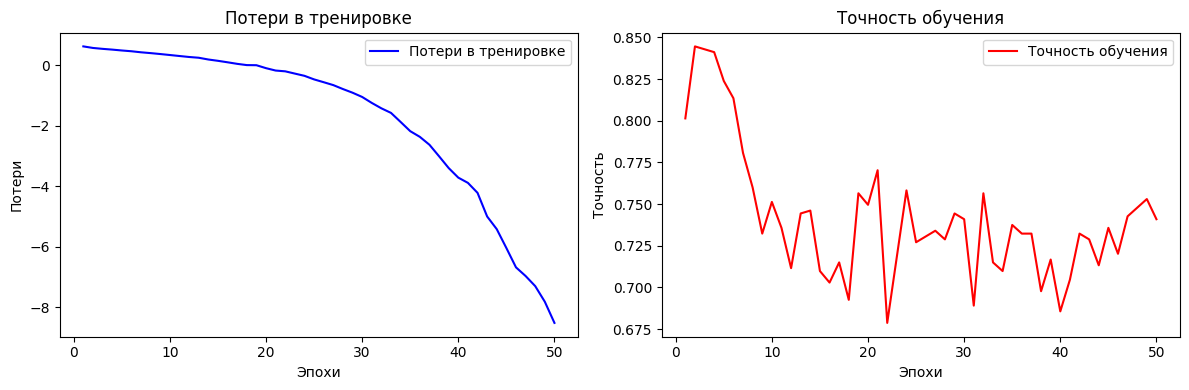

In [ ]:
# Вариант обучения на датасете.
# Предварительно выполнены: Загрузка и предобработка данных
# x_train - входные данные (табличные параметры из резюме)
# y_train - выходные данные (оценка пригодности)

# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(63,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)


В этом примере последний слой имеет один нейрон и функцию активации сигмоид.

Модель компилируется с оптимизатором 'adam', функцией потерь 'binary_crossentropy' (так как у нас два класса: "да" и "нет") и метрикой точности (accuracy).

Модель обучается на данных x_train и y_train в течение 50 эпох с размером пакета 32. Обученная модель оценивается на тех же данных для вычисления значения потерь и точности.

##### Проверяю предсказания этой модели

In [ ]:
# Загружаю и готовлю данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('/content/drive/MyDrive/Базы/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx')

In [ ]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
#fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

(579, 15)


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df_empty.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df_empty.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df_empty.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df_empty.columns.get_loc('Город')
COL_EMPL        = fixed_df_empty.columns.get_loc('Занятость')
COL_SCHED       = fixed_df_empty.columns.get_loc('График')
COL_EXP         = fixed_df_empty.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df_empty.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df_empty.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df_empty.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df_empty.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df_empty.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = fixed_df_empty.columns.get_loc('Ключевые навыки')
COL_TASKS       = fixed_df_empty.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = fixed_df_empty.columns.get_loc('Обо мне')

In [ ]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой

# x_test, y_test = get01Data(fixed_df_empty.values) # В варианте использования функции 1
x_test, y_test = construct_train_data(fixed_df_empty.values)  # В варианте использования функции 2



In [ ]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 6
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

x_test.shape: (579, 63)
y_test.shape: (579,)
Пример результата векторизации данных в строке n (x_test[n]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
Пример результата векторизации данных в строке n (y_test[n]): 1


In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
pred

19/19 [==============================] - 0s 1ms/step


array([[9.86772656e-01],
       [1.00000000e+00],
       [9.38880980e-01],
       [9.99999940e-01],
       [2.55881920e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.97925903e-03],
       [1.00000000e+00],
       [9.43976939e-01],
       [9.99999940e-01],
       [9.99993742e-01],
       [9.88124132e-01],
       [1.00000000e+00],
       [1.98754073e-21],
       [8.80292773e-01],
       [9.93593097e-01],
       [1.00000000e+00],
       [1.44073956e-18],
       [5.39398603e-02],
       [1.00000000e+00],
       [4.21398129e-15],
       [3.93604341e-06],
       [9.97481465e-01],
       [9.99962747e-01],
       [9.98521507e-01],
       [9.98664379e-01],
       [2.09867721e-07],
       [9.66383576e-01],
       [7.56070132e-16],
       [1.00000000e+00],
       [8.68550539e-01],
       [9.38438356e-01],
       [1.00000000e+00],
       [2.43218936e-04],
       [1.48102614e-10],
       [1.00000000e+00],
       [1.03794737e-02],
       [1.00000000e+00],
       [8.00647974e-01],


In [ ]:
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)
sum(predictions)

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

232

В загруженном датасете метки были такие:
image.png


С меткам загруженного ДС не совпадает предсказаение по 10 строке резюме (вместо "да" предсказано "нет")

##### Еще нейронка по простым табличным данным


Epoch 1/50
2/2 [==============================] - 1s 228ms/step - loss: 0.8669 - mae: 0.7164 - val_loss: 4.4169 - val_mae: 2.0139
Epoch 2/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1070 - mae: 0.2722 - val_loss: 2.9939 - val_mae: 1.6613
Epoch 3/50
2/2 [==============================] - 0s 82ms/step - loss: 0.1126 - mae: 0.3066 - val_loss: 3.3663 - val_mae: 1.7544
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0318 - mae: 0.1216 - val_loss: 3.7299 - val_mae: 1.8416
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0251 - mae: 0.0759 - val_loss: 3.8373 - val_mae: 1.8700
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0276 - mae: 0.0881 - val_loss: 3.7261 - val_mae: 1.8403
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0206 - mae: 0.0632 - val_loss: 3.5277 - val_mae: 1.7937
Epoch 8/50
2/2 [==============================] - 0s 84ms/step - loss: 0.0229 - mae: 0.0968 - va

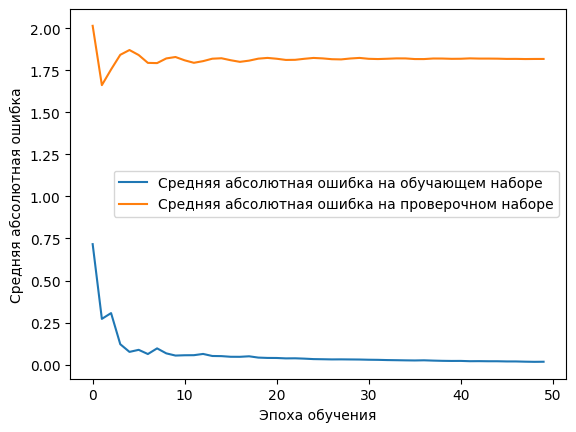

In [ ]:
# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(x_train_02.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(x_train_02,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

тут видно переобучение

In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)
print(pred)
print(predictions)

19/19 [==============================] - 0s 4ms/step
[[ 3.87346596e-01]
 [ 4.14014071e-01]
 [ 4.55430567e-01]
 [ 3.78777653e-01]
 [ 3.49193782e-01]
 [ 3.76444846e-01]
 [ 5.32271445e-01]
 [ 2.32772470e-01]
 [ 4.56798881e-01]
 [ 4.23363000e-01]
 [-7.68829044e-03]
 [ 7.79180415e-03]
 [ 7.11232424e-03]
 [ 1.62925608e-02]
 [-1.09467516e-03]
 [ 1.50989601e-02]
 [ 2.51795561e-03]
 [ 3.06005450e-03]
 [-1.22773396e-02]
 [ 1.18680550e-02]
 [ 9.90176294e-03]
 [-2.65583070e-03]
 [-8.98285862e-03]
 [ 6.90942630e-03]
 [ 1.00143086e-02]
 [ 1.11495610e-02]
 [-1.36902556e-02]
 [ 8.75034463e-03]
 [ 1.41029963e-02]
 [ 2.99270637e-03]
 [-2.07124371e-03]
 [ 2.79091485e-03]
 [ 4.90638288e-03]
 [-1.76536422e-02]
 [ 1.00454548e-02]
 [-1.37754232e-02]
 [ 2.46210452e-02]
 [ 7.78593402e-03]
 [-5.66450320e-03]
 [ 1.92056224e-03]
 [-3.40745226e-02]
 [-7.98474625e-03]
 [-8.81402567e-03]
 [ 4.55183908e-02]
 [-5.49985282e-03]
 [-1.85467629e-03]
 [-1.10924430e-02]
 [-1.82081573e-03]
 [ 2.59900950e-02]
 [ 1.45661756e-0

In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = model.predict(x_train_02)
pred = pred.flatten()
# Среднее значение ошибки
delta = pred - y_train
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

19/19 [==============================] - 0s 3ms/step
0.2957136095887523


Результаты предсказаний хуже, чем в первом варианте (все предсказания отрицательные). Бракую эту модель. Использовать буду предыдущую.
Активационной функцией на выходном слое все же лучше sigmoid

 #### Модель для текстовых данных о текущей работе

Подготовленная и протестированная ранее модель для обработки данных по текущей работе соискателя удалена из данного ноутбука. т.к работала с другой размерностью входных данных, не требоваших нормализации на входе.  Нижеприведенная модель адаптирована под изменения предобработанных данных по текущей работе соискателя.

Epoch 1/100
4/4 [==============================] - 1s 65ms/step - loss: 1.0032 - accuracy: 0.2397 - val_loss: 0.6853 - val_accuracy: 0.7759
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7110 - accuracy: 0.4600 - val_loss: 0.6711 - val_accuracy: 0.8190
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5662 - accuracy: 0.6501 - val_loss: 0.6632 - val_accuracy: 0.8190
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4901 - accuracy: 0.7171 - val_loss: 0.6581 - val_accuracy: 0.8190
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4634 - accuracy: 0.7538 - val_loss: 0.6554 - val_accuracy: 0.8190
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4243 - accuracy: 0.7559 - val_loss: 0.6535 - val_accuracy: 0.8190
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3628 - accuracy: 0.7495 - val_loss: 0.6525 - val_accuracy: 0.8190
Epoch 8/100
4/4 [===

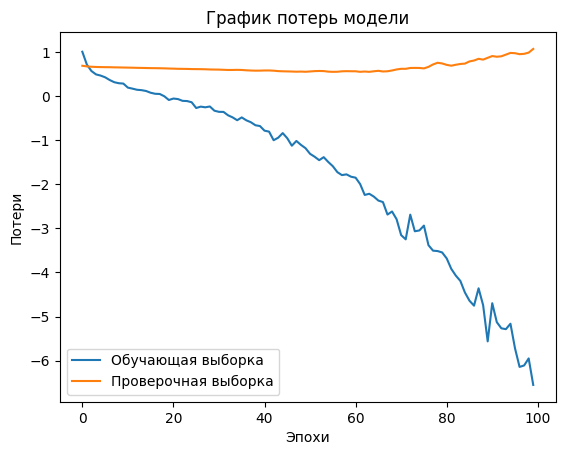

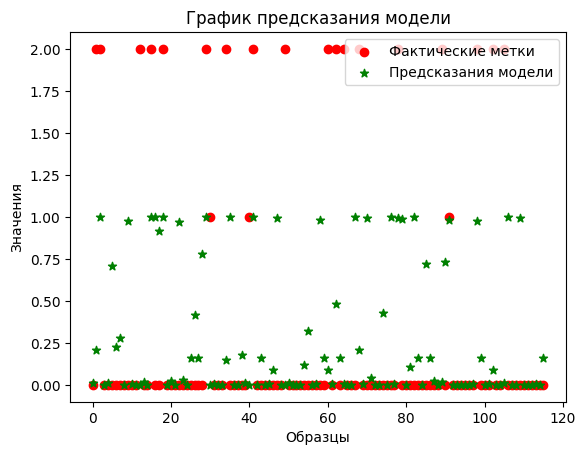

In [ ]:
# Модель для обучения тексту об месте работы и должности
x_train_02, y_train = construct_train_data(fixed_df.values)

# Разделение на обучающую и проверочную выборки
x_train_txt_prof, x_val_txt_prof, y_train, y_val = train_test_split(xTrainTProfVectors, y_train, test_size=0.2, random_state=42)

# Создание модели
model = Sequential()

# Слой нормализации данных
model.add(BatchNormalization(input_shape=(300,)))

# Полносвязный слой с 128 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

# Выходной слой с 1 нейроном и функцией активации sigmoid для предсказания вероятности
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_txt_prof, y_train, validation_data=(x_val_txt_prof, y_val), epochs=100, batch_size=128)


# Получение предсказаний модели на проверочной выборке
y_pred = model.predict(x_val_txt_prof)

# Построение графика потерь
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('График потерь модели')
plt.legend()
plt.show()

# Построение графика предсказания
plt.scatter(range(len(y_val)), y_val, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_val)), y_pred, c='green', marker='*', label='Предсказания модели')
plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказания модели')
plt.legend()
plt.show()


Результат - все предсказания отрицательные, вклюячая те попавшие в выборку 3 резюме, что Заказчиком определены как "подходит". Виден огромный дисбалансе положительных к отрицательным на обучении, что, наверное, и определяет такой результат.

#### Модель для текстовых данных об образовании

Epoch 1/80
13/13 [==============================] - 3s 74ms/step - loss: 0.0251 - mae: 0.0514 - val_loss: 1.7579 - val_mae: 0.8915
Epoch 2/80
13/13 [==============================] - 0s 14ms/step - loss: 0.0234 - mae: 0.0449 - val_loss: 1.7210 - val_mae: 0.8932
Epoch 3/80
13/13 [==============================] - 0s 18ms/step - loss: 0.0213 - mae: 0.0455 - val_loss: 1.7426 - val_mae: 0.8956
Epoch 4/80
13/13 [==============================] - 0s 15ms/step - loss: 0.0194 - mae: 0.0465 - val_loss: 1.7150 - val_mae: 0.8965
Epoch 5/80
13/13 [==============================] - 0s 16ms/step - loss: 0.0164 - mae: 0.0445 - val_loss: 1.7204 - val_mae: 0.8980
Epoch 6/80
13/13 [==============================] - 0s 17ms/step - loss: 0.0132 - mae: 0.0439 - val_loss: 1.7285 - val_mae: 0.9019
Epoch 7/80
13/13 [==============================] - 0s 16ms/step - loss: 0.0112 - mae: 0.0425 - val_loss: 1.7299 - val_mae: 0.9009
Epoch 8/80
13/13 [==============================] - 0s 11ms/step - loss: 0.0091 - m

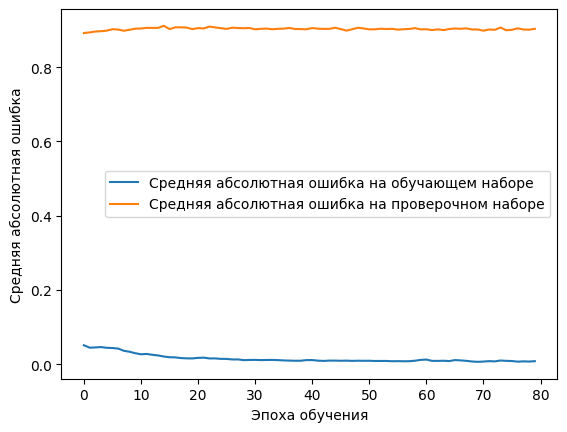

In [ ]:
# Модель определения пригодности соискателя  по данным об образовании
x_train_02, y_train = construct_train_data(fixed_df.values)
# здесь в параметрах maxWordCount = 5000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainEduc01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))                             # этим слоем модель отличается от предыдущей
modelTRez.add(Dense(1, activation='linear'))

modelTRez.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = modelTRez.fit(xTrainEduc01[:400],
                    y_train[:400],
                    batch_size=32,
                    epochs=80,
                    validation_data=(xTrainEduc01[400:], y_train[400:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()


Вывод: На несбалансированном датасете не получается добиться приемлемых результатов

На малом количестве данных сбалансированного датасета - получаем переобучение

### Составные  НС

Пробую собрать связку из 4 НС:
 - НС для работы с табличными данными по соискателю (вход 1)
 - НС для работы с текстом об текущем месте работы (вход 2)
 - НС для работы с текстом об образовании (вход 3)
 - НС для работы с текстом о ключевых навыках + задачи (вход 4)



---



In [ ]:
# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)
xTrainTProfVectors, y_train  ## это выходной вектор после предобработки данных об текущем месте работы. Надо нормализовать на входе в НС
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes)
xTrainTSkillsVectors, y_train ## это выходной вектор после предобработки данных о навыках соискателя. Надо нормализовать на входе в НС

# Построение составной модели. Вариант 1 (модель из практического ноутбука курса)

input1 = Input((x_train_02.shape[1],))  # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input(shape=(300,), name='xTrainTProfVectors')  # обучающая выборка по текстовым данным об текущем месте работы
input3 = Input((xTrainEduc01.shape[1],))  # обучающая выборка по текстовым данным об образовании
input4 = Input(shape=(300,), name='xTrainTSkillsVectors')  # обучающая выборка по текстовым данным об ключевых навыках

x1 = BatchNormalization()(input1)  # Создаем ветку х1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = BatchNormalization()(input2)  # Создаем ветку х2
x2 = Dense(25, activation="relu")(x2)
x2 = Dense(8, activation="tanh")(x2)
x2 = Dense(5, activation="elu")(x2)

x3 = BatchNormalization()(input3)  # Создаем ветку х3
x3 = Dense(1000, activation="tanh")(x3)
x3 = Dense(20, activation="elu")(x3)
x3 = Dense(5, activation="elu")(x3)

x4 = BatchNormalization()(input4)  # Создаем ветку х4
x4 = Dense(25, activation="relu")(x4)
x4 = Dense(8, activation="tanh")(x4)
x4 = Dense(5, activation="elu")(x4)

x = concatenate([x1, x2, x3, x4])  # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)  # Финальный нейрон, делает регрессию

model = Model(inputs=[input1, input2, input3, input4], outputs=x)  # В Model загружаем стартовые и последнюю точки

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model.fit(
    [x_train_02[:425], xTrainTProfVectors[:425], xTrainEduc01[:425], xTrainTSkillsVectors[:425]],  # первые 425/17 строк ДС
    y_train[:425],
    epochs=80,
    validation_data=(
        [x_train_02[425:], xTrainTProfVectors[425:], xTrainEduc01[425:], xTrainTSkillsVectors[425:] ],  # последние 75/6 строк
        y_train[425:]
    ),
    verbose=1,
    shuffle=True
)


Epoch 1/80
14/14 [==============================] - 5s 109ms/step - loss: 0.0507 - mae: 0.1173 - val_loss: 2.1523 - val_mae: 1.0791
Epoch 2/80
14/14 [==============================] - 1s 91ms/step - loss: 0.0239 - mae: 0.0375 - val_loss: 2.0915 - val_mae: 1.0499
Epoch 3/80
14/14 [==============================] - 1s 83ms/step - loss: 0.0237 - mae: 0.0340 - val_loss: 2.0577 - val_mae: 1.0355
Epoch 4/80
14/14 [==============================] - 1s 86ms/step - loss: 0.0226 - mae: 0.0344 - val_loss: 2.0433 - val_mae: 1.0331
Epoch 5/80
14/14 [==============================] - 2s 117ms/step - loss: 0.0203 - mae: 0.0354 - val_loss: 2.0333 - val_mae: 1.0326
Epoch 6/80
14/14 [==============================] - 2s 135ms/step - loss: 0.0240 - mae: 0.0453 - val_loss: 2.0278 - val_mae: 1.0324
Epoch 7/80
14/14 [==============================] - 2s 113ms/step - loss: 0.0232 - mae: 0.0422 - val_loss: 2.0267 - val_mae: 1.0326
Epoch 8/80
14/14 [==============================] - 1s 82ms/step - loss: 0.0217

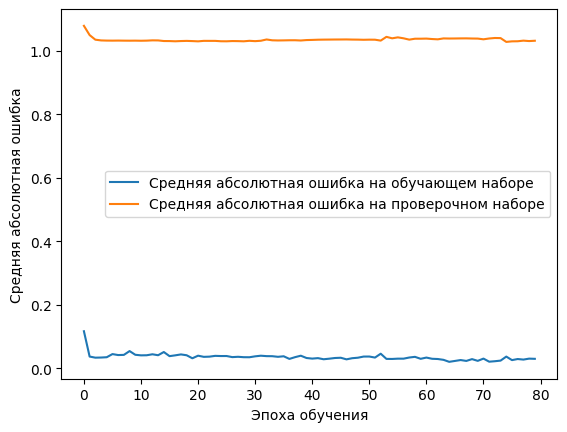

In [ ]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

Неприемлемый результат обучения на исходном датасете. Бракую эту модель

In [ ]:
# Доработанный код составной модели (Вариант 2: балансировка входных данных для обучения + колбэки + оптимальные подобранные НС):

from imblearn.over_sampling import RandomOverSampler

# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes)
#  xTrainTProfVectors - используется в этой модели
#  xTrainTSkillsVectors - не используется
#  xTrainTSkillsTasksVectors - используется в этой модели
#  xTrainTSkillsTasksAboutVectors - не используется
#  xTrainTAboutVectors - используется в этой модели

# Применение oversampling для балансировки выборки
oversampler = RandomOverSampler(random_state=42)

x_resampled_tab_02, y_resampled_tab_02 = oversampler.fit_resample(x_train_02, y_train)
x_resampled_txt_Prof, y_resampled_txt_Prof = oversampler.fit_resample(xTrainTProfVectors, y_train)
x_resampled_txt_Educ, y_resampled_txt_Educ = oversampler.fit_resample(xTrainEduc01, y_train)
# x_resampled_txt_Skills, y_resampled_txt_Skills = oversampler.fit_resample(xTrainTSkillsVectors, y_train)
x_resampled_txt_SkillsTasks, y_resampled_txt_SkillsTasks = oversampler.fit_resample(xTrainTSkillsTasksVectors, y_train)
# x_resampled_txt_SkillsTasksAbout, y_resampled_txt_SkillsTasksAbout = oversampler.fit_resample(xTrainTSkillsTasksAboutVectors, y_train)
x_resampled_txt_About, y_resampled_txt_About = oversampler.fit_resample(xTrainTAboutVectors, y_train)

In [ ]:
# Чтобы убедиться, что размерности данных и целевых значений совпадают, и они готовы для использования в обучении модели:

print(x_resampled_tab_02.shape)  # Размерность данных x_resampled_tab_02
print(y_resampled_tab_02.shape)  # Размерность целевых значений y_resampled_tab_02

print(x_resampled_txt_Prof.shape)  # Размерность данных x_resampled_txt_Prof
print(y_resampled_txt_Prof.shape)  # Размерность целевых значений y_resampled_txt_Prof

print(x_resampled_txt_Educ.shape)  # Размерность данных x_resampled_txt_Educ
print(y_resampled_txt_Educ.shape)  # Размерность целевых значений y_resampled_txt_Educ

print(x_resampled_txt_SkillsTasks.shape)  # Размерность данных x_
print(y_resampled_txt_SkillsTasks.shape)  # Размерность целевых значений y_

print(x_resampled_txt_About.shape)  # Размерность данных x_
print(y_resampled_txt_About.shape)  # Размерность целевых значений y_

(1467, 63)
(1467,)
(1467, 300)
(1467,)
(1467, 5000)
(1467,)
(1467, 300)
(1467,)
(1467, 300)
(1467,)


In [ ]:
# теперь составная модель:

# Создание входных слоев
input1 = Input((x_resampled_tab_02.shape[1],))    # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input(shape=(300,), name='x_resampled_txt_Prof')  # обучающая выборка по текстовым данным об текущем месте работы
input3 = Input((x_resampled_txt_Educ.shape[1],))  # обучающая выборка по текстовым данным об обркзовании
input4 = Input(shape=(300,), name='x_resampled_txt_SkillsTasks')  # обучающая выборка по текстовым данным о ключевых навыках, задачах
input5 = Input(shape=(300,), name='x_resampled_txt_About')  # обучающая выборка по текстовым данными соискателя о себе

# Ветка х1 (изменена на НС для обработки табличных данных)
x1 = BatchNormalization()(input1)
x1 = Dense(128, activation="relu")(x1)
x1 = Dense(1000, activation="tanh")(x1)
x1 = Dense(100, activation="relu")(x1)
# x1 = Dense(1, activation="linear")(x1)           # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Ветка х2 (изменена на НС для обучения на текстовых данных по текущей работе)
x2 = BatchNormalization()(input2)
x2 = Dense(64, activation="relu")(x2)
# x2 = Dense(1, activation="sigmoid")(x2)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?


# Ветка х3 (изменена на НС для обучения на текстовых данных по образованию)
x3 = BatchNormalization()(input3)
x3 = Dense(20, activation="relu")(x3)
x3 = Dense(500, activation="relu")(x3)
x3 = Dropout(0.3) (x3)
#x3 = Dense(1, activation="linear")(x3)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Ветка х4 (изменена на НС для обучения на текстовых данных по ключевым навыкам+выполняемые задачи)
x4 = BatchNormalization()(input4)
x4 = Dense(64, activation="relu")(x4)
# x4 = Dense(1, activation="sigmoid")(x4)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Ветка х5 (изменена на НС для обучения на текстовых данных по даннвм соискателя о себе)
x5 = BatchNormalization()(input5)
x5 = Dense(64, activation="relu")(x5)
# x5 = Dense(1, activation="sigmoid")(x5)          # ???? надо ли включать выходной слой каждой модели в ветке? Или у них общий выходной слой?  Тогда какой?

# Объединение всех четырех веток
x = concatenate([x1, x2, x3, x4, x5])

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)           # Финальный нейрон, делает регрессию

# Создание модели
model = Model(inputs=[input1, input2, input3, input4, input5], outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Определение колбэков:
# EarlyStopping с параметром patience=10 и монитором val_loss. Этот колбэк останавливает обучение, если
# значение функции потерь на проверочной выборке не улучшается в течение 10 эпох:
# early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
# ModelCheckpoint с параметром save_best_only=True и монитором val_loss. Этот колбэк сохраняет только
# лучшую модель на основе значения функции потерь на проверочной выборке:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
# ReduceLROnPlateau с параметрами factor=0.1, patience=5 и монитором val_loss. Этот колбэк  уменьшает скорость
# обучения на 10% в случае, если значение функции потерь на проверочной выборке не улучшается в течение 5 эпох:
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss')
# Обучение модели с использованием колбэков

# !!! При передаче целевых значений в функцию model.fit, необходимо объединить их в список, так как функция model.fit ожидает
# один список для целевых значений:

history = model.fit(
    [x_resampled_tab_02[:782], x_resampled_txt_Prof[:782], x_resampled_txt_Educ[:782], x_resampled_txt_SkillsTasks[:782], x_resampled_txt_About[:782]],  # первые 782/425/17 строк ДС после oversampling
    [y_resampled_tab_02[:782], y_resampled_txt_Prof[:782], y_resampled_txt_Educ[:782], y_resampled_txt_SkillsTasks[:782], y_resampled_txt_About[:782]],  # Используем сбалансированные целевые значения
    epochs=80,
    validation_data=(
        [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:], x_resampled_txt_SkillsTasks[782:], x_resampled_txt_About[782:]],  # последние х/75/6 строк после oversampling
        [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:], y_resampled_txt_SkillsTasks[782:], y_resampled_txt_About[782:]]  # Используем сбалансированные целевые значения
    ),
    verbose=1,
    shuffle=True,
  # callbacks=[early_stopping, model_checkpoint, reduce_lr]   # включены все 3 колбэка
  callbacks=[model_checkpoint, reduce_lr]                 # вЫключен EarlyStopping
)

Epoch 1/80
25/25 [==============================] - 5s 45ms/step - loss: 0.5454 - mae: 0.5164 - val_loss: 2.4577 - val_mae: 1.4915 - lr: 0.0010
Epoch 2/80
25/25 [==============================] - 0s 19ms/step - loss: 0.4555 - mae: 0.4546 - val_loss: 2.3603 - val_mae: 1.4529 - lr: 0.0010
Epoch 3/80
25/25 [==============================] - 0s 19ms/step - loss: 0.3866 - mae: 0.4083 - val_loss: 2.1220 - val_mae: 1.3695 - lr: 0.0010
Epoch 4/80
25/25 [==============================] - 0s 19ms/step - loss: 0.3433 - mae: 0.3871 - val_loss: 1.9881 - val_mae: 1.3322 - lr: 0.0010
Epoch 5/80
25/25 [==============================] - 1s 23ms/step - loss: 0.3244 - mae: 0.3664 - val_loss: 1.6784 - val_mae: 1.2190 - lr: 0.0010
Epoch 6/80
25/25 [==============================] - 0s 16ms/step - loss: 0.2748 - mae: 0.3500 - val_loss: 1.9275 - val_mae: 1.3067 - lr: 0.0010
Epoch 7/80
25/25 [==============================] - 0s 20ms/step - loss: 0.2564 - mae: 0.3362 - val_loss: 1.1039 - val_mae: 0.9803 - lr:

Комментарий к коду выше:

Здесь добавлено сэмплирование данных с использованием метода RandomOverSampler, чтобы сбалансировать датасет. Цель - учить модель на примерно равном количестве примеров положительного и отрицательного классов.

При переработке исходного кода для составной модели выполнены следующие шаги:

Импорт класса RandomOverSampler из модуля imblearn.over_sampling (добавлен и в сборник библиотек).

Применение oversampling к обучающей выборке, вызывая fit_resample у RandomOverSampler. Цель - сбалансированный набор данных, в котором положительные и отрицательные примеры будут иметь примерно одинаковое количество.

Используем сбалансированный набор данных X_resampled и y_resampled вместо исходных x_train и y_train в вызове model.fit.

При определении входных слоев и их веток выполнены преобразования в соответствии с подобранными моделями (относительно исходной составной модели, взятой с практического ноутбука курса)

Т.о, этот код учитывает несбалансированность данных путем применения oversampling и использования сбалансированного набора данных для обучения модели с подобранными НС для данного ДС



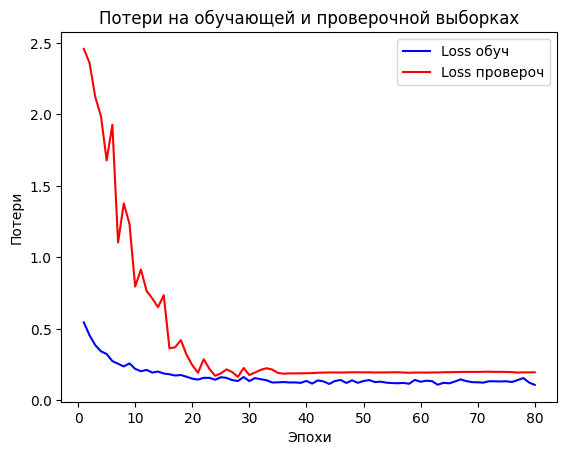

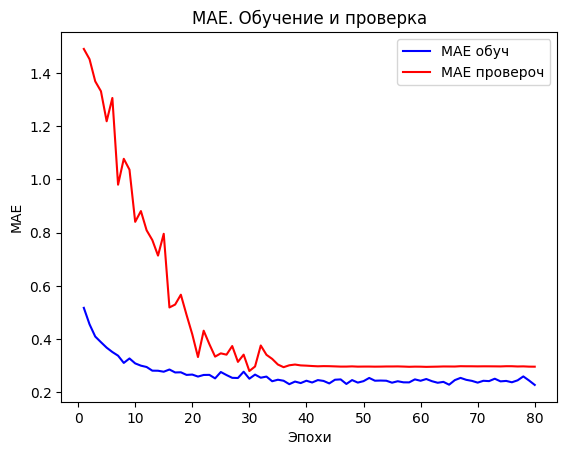

In [ ]:
# Визуализация обучения:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)

# График функции потерь
plt.figure()
plt.plot(epochs, loss_values, 'b', label= 'Loss обуч')
plt.plot(epochs, val_loss_values, 'r', label='Loss провероч')
plt.title('Потери на обучающей и проверочной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# График метрики MAE
plt.figure()
plt.plot(epochs, mae_values, 'b', label='MAE обуч')
plt.plot(epochs, val_mae_values, 'r', label='MAE провероч')
plt.title('MAE. Обучение и проверка')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()
plt.show()



ВЫВОДЫ по обучаемости модели:

1. Вполне себе обучается.

2. Колбек EarlyStopping с параметром patience=10 и монитором val_loss прерывает обучение на 55 эпохе.


In [ ]:
# Оценка модели на проверочной выборк
val_loss, val_mae = model.evaluate(
    [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:], x_resampled_txt_SkillsTasks[782:], x_resampled_txt_About[782:]],
    [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:], y_resampled_txt_SkillsTasks[782:], y_resampled_txt_About[782:]]
)
print("Loss на проверочных данных:", val_loss)
print("MAE на проверочных данных:", val_mae)


22/22 [==============================] - 0s 3ms/step - loss: 0.1967 - mae: 0.2948
Loss на проверочных данных: 0.1967063695192337
MAE на проверочных данных: 0.29480689764022827


## Выполнение предсказаний на тестовых данных

Для выполнения предсказаний на тестовых данных, необходимо:

1. Подвергнуть тестовый датасет такой же обработе, которую применяли для обучения НС: Извлечь данные, причесать, оцифровать и сформировать выборку для подачи в обученную ранее НС

2. Скормить данные ранее обученной НС, которая выполнит предсказание.  Результат записать в дополнительное (новое) поле исходного дататсета.

3. Экспортировать обогощенный новым полем дататсет в новый файл, с новым полем для передачи Заказчику.

In [ ]:
# Загрузка и подготовка данных тестового датасета для предсказаний обученной НС
# Предполагается, что тестовые данные составят файл test_dataset c такой же структурой данных, как и исходный.
# Загрузим как файл .xlsx
test_dataset = pd.read_excel('test_dataset_2.xlsx') # здесь только размеченные Заказчиком резюмe
#Убрать лишние столбцы
test_dataset = test_dataset.drop(data.columns[0],axis = 1)              # Убираем первый столбец с продублированными индексами. Он нам не нужен
test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)      # Убираем первый столбец с датой отклика. Он нам не нужен
# test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен

# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(test_dataset.shape[0]): # По всем резюме
        if type(test_dataset.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\xa0","")
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

# Настройка названий столбцов.
COL_SEX_AGE     = test_dataset.columns.get_loc('Пол, возраст')
COL_SALARY      = test_dataset.columns.get_loc('ЗП')
COL_POS_SEEK    = test_dataset.columns.get_loc('Ищет работу на должность')
COL_CITY        = test_dataset.columns.get_loc('Город')
COL_EMPL        = test_dataset.columns.get_loc('Занятость')
COL_SCHED       = test_dataset.columns.get_loc('График')
COL_EXP         = test_dataset.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = test_dataset.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = test_dataset.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = test_dataset.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = test_dataset.columns.get_loc('Обновление резюме')
СOL_RESULT      = test_dataset.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = test_dataset.columns.get_loc('Ключевые навыки')
COL_TASKS       = test_dataset.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = test_dataset.columns.get_loc('Обо мне')

# Вытаскиваю из дататсета текстовые данные по должности и месту работы для выборки
xTestProf = getXTrainTProf(test_dataset.values)

# Преобразование текста о работе в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestProfVectors = [text_to_vector(text) for text in xTestProf]
xTestProfVectors = np.array(xTestProfVectors)

## Вытаскиваю из дататсета текстовые данные по ключевым навыкам
#xTestSkills = getXTrainTSkills(test_dataset.values)

###### Вытаскиваю из дататсета текстовые данные по ключевым навыкам и задачам
###### xTestSkillsTasks = getXTrainTSkillsTasks(test_dataset.values)

## Преобразование текста о навыках в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
#xTestSkillsVectors = [text_to_vector(text) for text in xTestSkills]
#xTestSkillsVectors = np.array(xTestSkillsVectors)

# Преобразование текста о навыках и задачах в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestSkillsTasks = test_dataset.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTestSkillsTasksVectors = [text_to_vector(text) for text in xTestSkillsTasks]
xTestSkillsTasksVectors = np.array(xTestSkillsTasksVectors)

# Вытаскиваю из дататсета текстовые данные по образованию для выборки
xTestEduc = getXTrainTEduc(test_dataset.values)

# Преобразование текста в последовательность индексов, согласно частотному словарю созданному при обучении (!!!)
xTestEducIndexes = tokenizer.texts_to_sequences(xTestEduc)            # преобразование текстов в индексы

# Преобразование текста "о себе" в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestAbout = test_dataset.apply(lambda row: preprocess_about(row), axis=1)
xTestAboutVectors = [text_to_vector(text) for text in xTestAbout]
xTestAboutVectors = np.array(xTestAboutVectors)

# Формирование выборки из загруженного набора простых табличных данных
x_test_02, y_test = construct_train_data(test_dataset.values)

# С вектором текста о работе ничего не делаю.
# С вектором текста о навыках ничего не делаю.

# Преобразование полученной текстовой выборки по образованию из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words:
xTestEduc01 = tokenizer.sequences_to_matrix(xTestEducIndexes)

NameError: ignored

In [ ]:
# Проверка размерности всех данных на вход для предсказаний
print(x_test_02.shape)
print(xTestProfVectors.shape)
print(xTestEduc01.shape)
print(xTestSkillsTasksVectors.shape)
#print(xTestSkillsTasksAboutVectors.shape)
print(xTestAboutVectors.shape)
print(y_test.shape)


(23, 63)
(23, 300)
(23, 5000)
(23, 300)
(23, 300)
(23,)



Для добавления колонки "оценка резюме" с процентным распределением вероятностей между классами "подходит" и "не подходит" в тестовый датасет, можно воспользоваться следующим кодом:

In [ ]:
# Получение предсказаний модели на тестовых данных.

#predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsVectors])  # используется та модель, которая которой присвоено имя "model" последней
predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])  # используется та модель, которая которой присвоено имя "model" последней

# Вычисление процентного распределения вероятностей
percentage = predictions * 100

# Формирование колонки "оценка резюме" в формате "подходит % / не подходит %"
evaluation = []
for p in percentage:
  if p >= 50:
    evaluation.append(f"подходит {p[0]:.2f}%")   #Форматирование f-строки поддерживается для обычных числовых типов данных, но не для массивов NumPy.
# Для избежания ошибки в выполении кода  нужно применить форматирование f-строки к каждому элементу массива p в цикле.
# Здесь мы используем p[0], чтобы получить значение из массива p, так как p является массивом с единственным элементом.
  else:
    evaluation.append(f"НЕ подходит {100 - p[0]:.2f}%")

# Добавление колонки "оценка резюме" в тестовый датасет
test_dataset['оценка резюме НС'] = evaluation

# Экспорт тестового датасета в CSV-файл
test_dataset.to_csv('test_dataset_with_evaluation.csv', index=True) #  Параметр index=False указывает, что индексы строк не должны быть
# включены в выходной CSV-файл.


1/1 [==============================] - 0s 75ms/step


Этим кодом мы сначала получаем предсказания модели на тестовых данных. Затем вычисляем процентное распределение вероятностей, умножая предсказания на 100. Далее, формируем колонку "оценка резюме" в формате "подходит % / не подходит %" для каждого предсказания. Затем, добавляем эту колонку в тестовый датасет.

**Внимание!**  Предполагаем, что от Заказчика получен тестовый датасет - файл с названием "test_datase" форматом  = исходному, **включая колонку с метками (возможно - пустую)** и который мы дополняем  новой колонкой "оценка резюме НС".

1/1 [==============================] - 0s 39ms/step


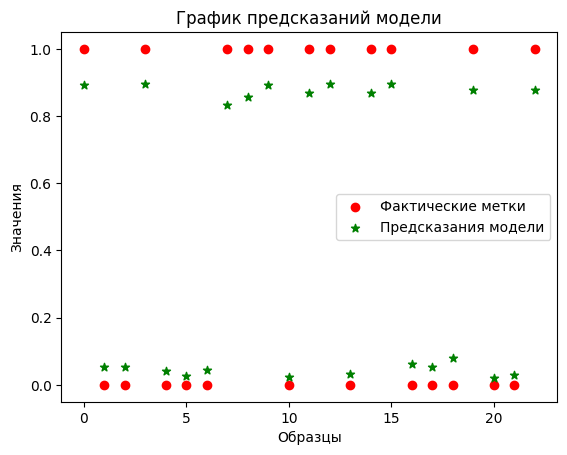

In [ ]:
# Визуализация предсказаний относительно меток

import matplotlib.pyplot as plt

# Предсказанные значения модели
#y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01,xTestSkillsVectors])
y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])

# Построение графика
plt.scatter(range(len(y_test)), y_test, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_test)), y_pred, c='green', marker='*', label='Предсказания модели')

plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказаний модели')
plt.legend()
plt.show()


In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1])

In [ ]:
# посмотрим, как выглядит результат
test_dataset.head(23)

Пол, возраст            ЗП  \
0                                     Женщина   90 000 руб.   
1    Мужчина, 36 лет, родился 22 октября 1986    не указана   
2    Мужчина, 28 лет, родился 18 октября 1994   70 000 руб.   
3                                     Женщина    не указана   
4    Женщина, 41 год, родилась 2 декабря 1981    не указана   
5    Женщина, 43 года, родилась 15 марта 1979   70 000 руб.   
6   Женщина, 49 лет, родилась 26 октября 1973    не указана   
7   Мужчина, 33 года, родился 23 августа 1989  150 000 руб.   
8    Мужчина, 32 года, родился 7 декабря 1990    не указана   
9    Мужчина, 26 лет, родился 21 февраля 1996  150 000 руб.   
10     Женщина, 38 лет, родилась 15 июля 1984  130 000 руб.   
11     Женщина, 31 год, родилась 26 июня 1991  120 000 руб.   
12    Женщина, 36 лет, родилась 20 марта 1987  100 000 руб.   
13     Женщина, 45 лет, родилась 22 июня 1977   95 000 руб.   
14  Женщина, 24 года, родилась 27 апреля 1998   30 000 руб.   
15   Женщина, 28 лет, родилась 5 декабря 1994    не указана   
16     Мужчина, 37 лет, родился 25 марта 1985    не указана   
17    Мужчина, 37 лет, родился 23 января 1986    не указана   
18   Мужчина, 24 года, родился 3 августа 1998    не указана   
19     Женщина, 31 год, родилась 16 июля 1991   40 000 руб.   
20                                    Мужчина  120 000 руб.   
21                                    Мужчина   50 000 руб.   
22   Женщина, 21 год, родилась 2 августа 2001   20 000 руб.   

                             Ищет работу на должность  \
0                              Growth Product Manager   
1   Product Manager в команду Финансового департам...   
2   Product Manager в команду Финансового департам...   
3                              Growth Product Manager   
4   Product Manager в команду Финансового департам...   
5   Product Manager в команду Финансового департам...   
6   Product Manager в команду Финансового департам...   
7                              Growth Product Manager   
8                              Growth Product Manager   
9                              Growth Product Manager   
10  Product Manager в команду Финансового департам...   
11           Product manager в Growth Hacking команду   
12                       Директор медицинской клиники   
13                                    Project manager   
14                                      HR-специалист   
15                                      HR-специалист   
16  Product Manager в команду Финансового департам...   
17                       Product Manager в команду HR   
18                       Product Manager в команду HR   
19                                      HR-специалист   
20                       Product Manager в команду HR   
21                                    Project manager   
22                                      HR-специалист   

                                                Город  \
0   Индонезия, Не готова к переезду, не готова к к...   
1     Уфа, Не готов к переезду, готов к командировкам   
2        Уфа, Готов к переезду, готов к командировкам   
3   Москва, Готова к переезду, готова к командировкам   
4   Уфа, Готова к переезду: Москва, Россия, Астрах...   
5   Уфа, Готова к переезду: Москва, Екатеринбург, ...   
6   Уфа, Не готова к переезду, готова к редким ком...   
7   Санкт-Петербург, Готов к переезду: Москва, гот...   
8   Москва, м. Молодежная, Хочу переехать, готов к...   
9        Пермь, Хочу переехать, готов к командировкам   
10  Уфа, Не готова к переезду, готова к редким ком...   
11  Индонезия, Не готова к переезду, не готова к к...   
12  Уфа, Не готова к переезду, готова к редким ком...   
13     Уфа, Готова к переезду, готова к командировкам   
14  Уфа, Не готова к переезду, не готова к команди...   
15  Уфа, Не готова к переезду, не готова к команди...   
16  Уфа, Не готов к переезду, готов к редким коман...   
17  Екатеринбург, Не готов к переезду, не готов к ...   
18   Кишинёв, Готов к переезду, готов к командировкам   
19  Уфа, Не

Сравнение результатов прошлых предсказаний с новыми:
- желтый фон предсказания модели без учета новых текстовых полей

- зеленый фон - предсказания модели с добавленной веткой обработки текста "навыки". Сравнение относительно желтого (в среднем лучше на 1.37%)

- св терракот - предсказания модели с добавленной веткой обработки текста "навыки"+ "задачи". Сравнение относительно желтого (в среднем лучше на 0.54%).

- терракотовый - предсказание модели с добавленной веткой обработки текстов "навыки"+"задачи" с предобработкой данных в этих полях. Сравнение относительно желтого (в среднем лучше на 1.41%).

- голубой - предсказание модели с добавленной веткой обработки текстов "навыки" + "задачи" + "об себе" с предобработкой данных в эих полях. Сравнение относительно желтого (в среднем хуже на 0.33%).

- серый  - предсказание модели с добавленной веткой обработки предобработанных данных в полях "навыки" + "задачи" и дополнительной веткой обработки предобработанных данных поля "о себе". Сравнение относительно желтого (в среднем лучше на 0.25%)

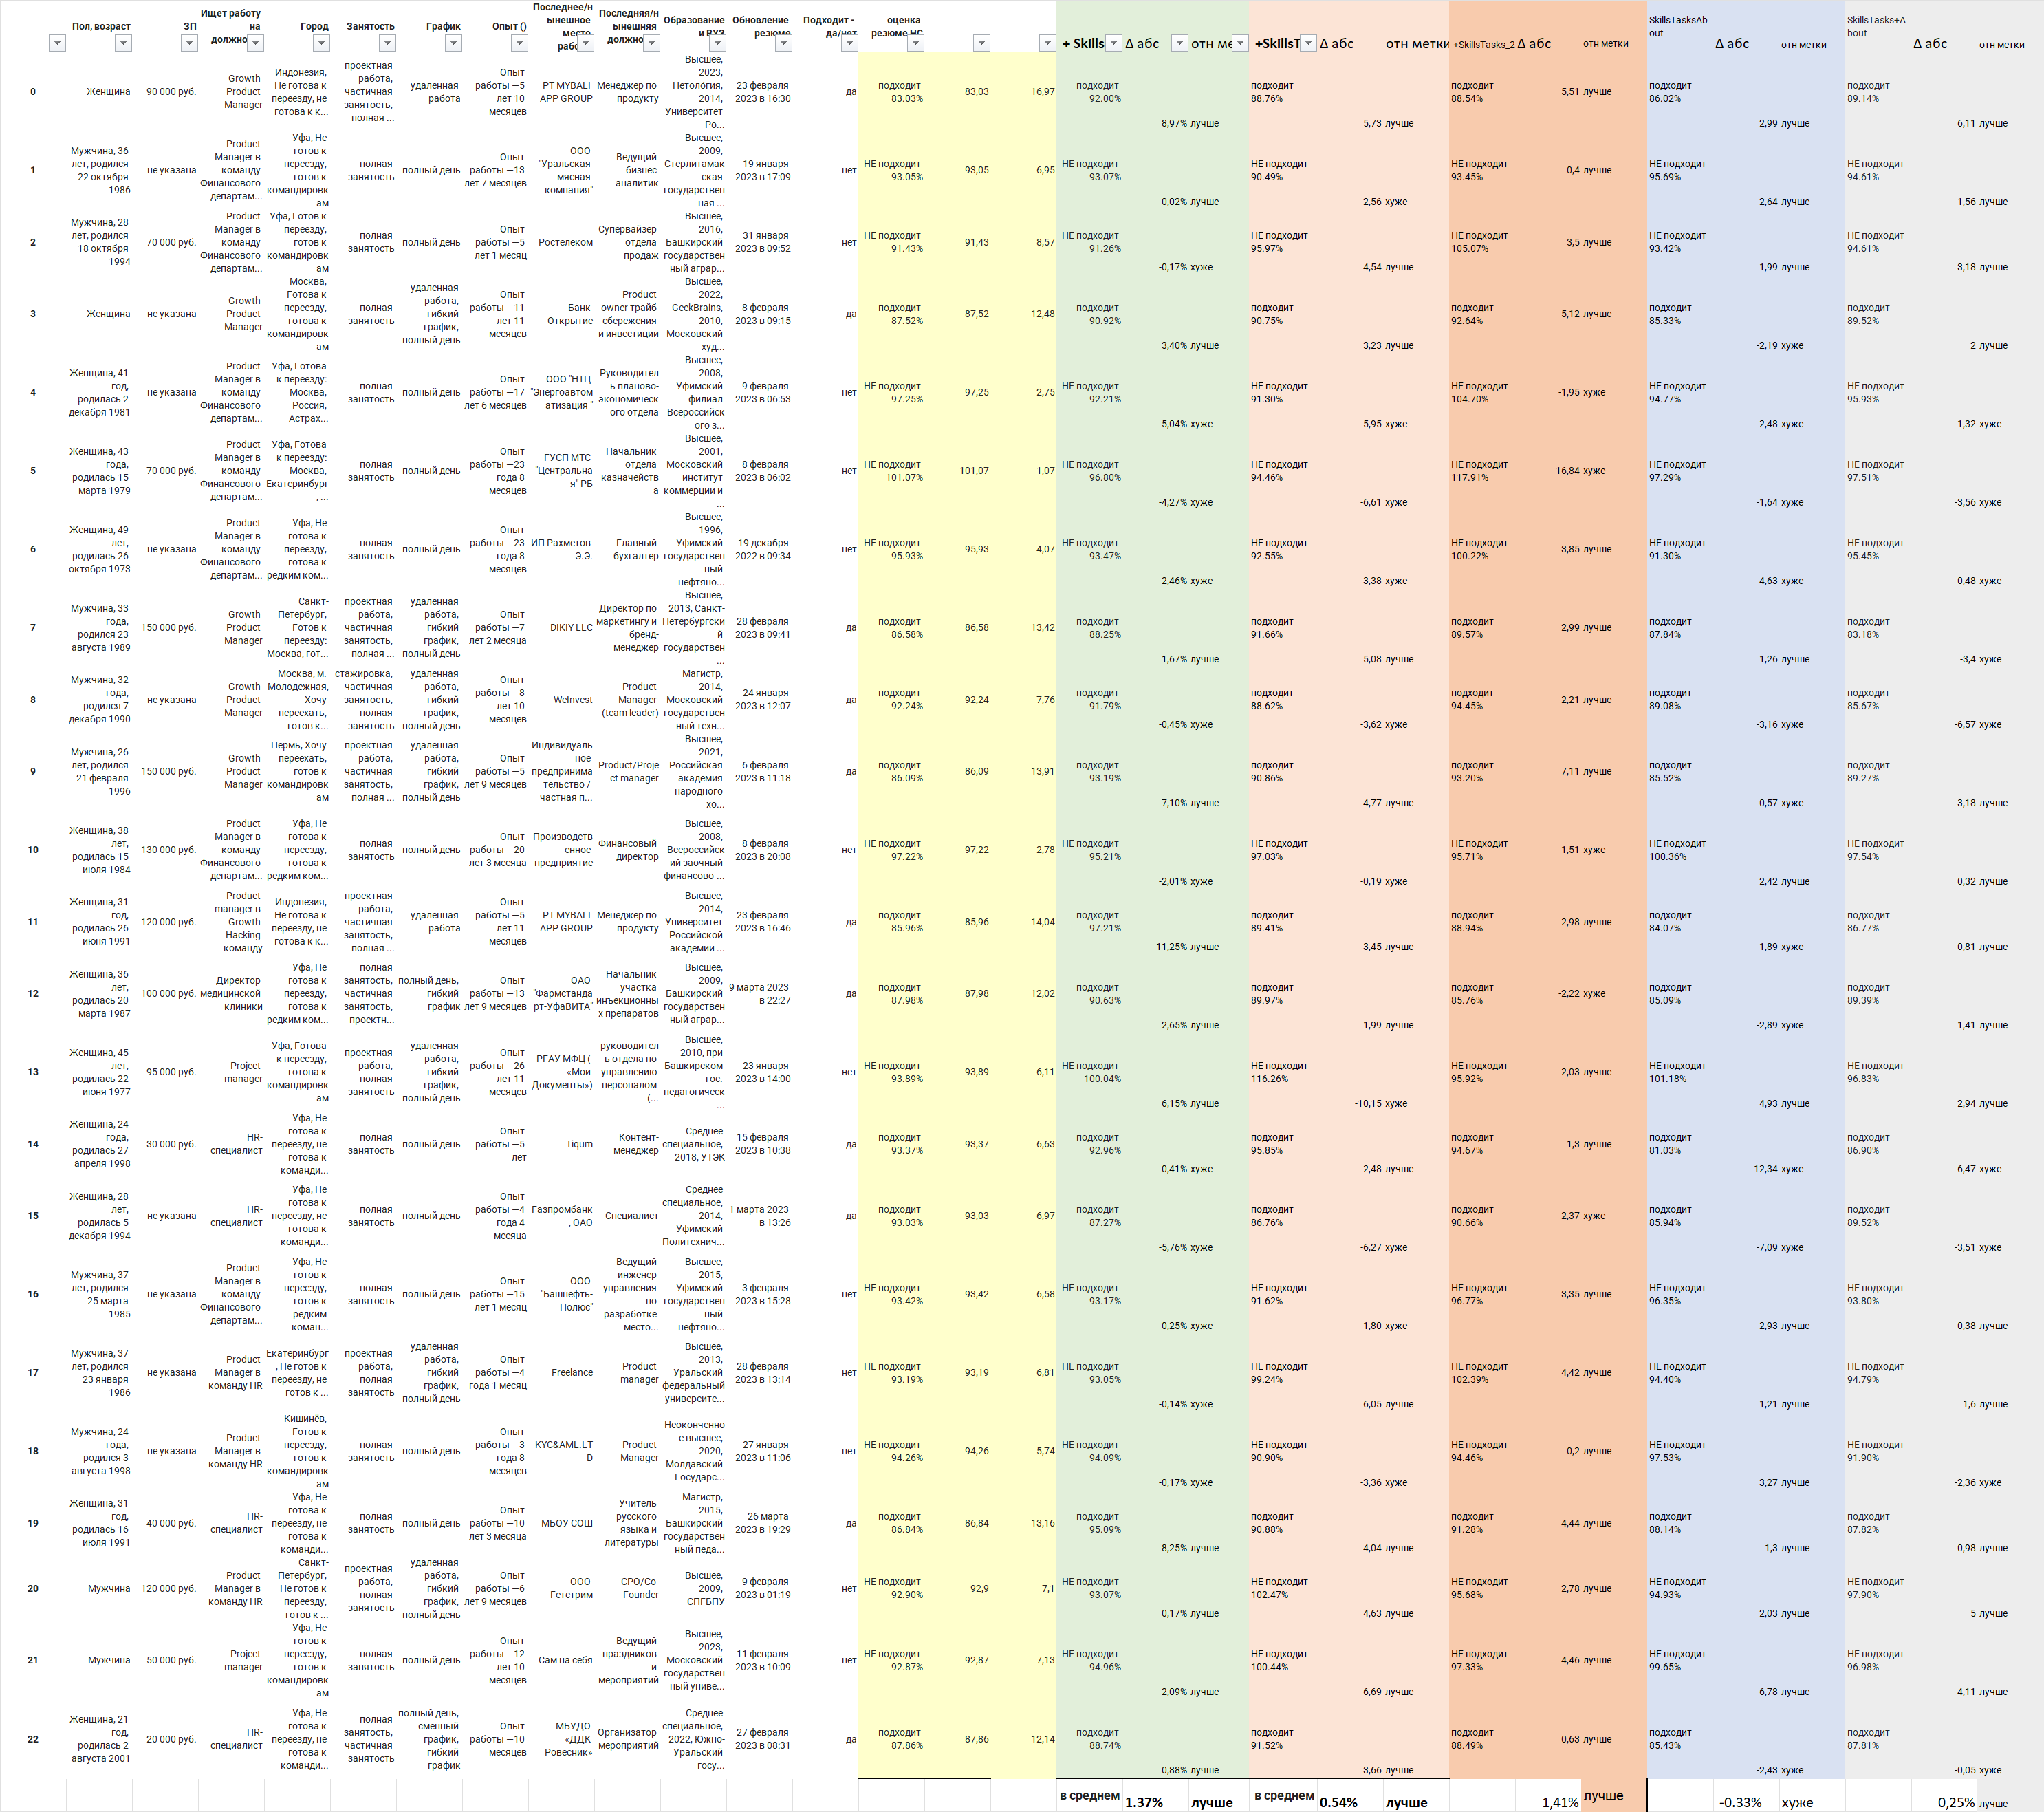

Выполнение предсказаний на неразмеченных заказчиком данных.



In [ ]:
# Загрузка и подготовка данных тестового датасета для предсказаний обученной НС
# Предполагается, что тестовые данные составят файл test_dataset c такой же структурой данных, как и исходный.
# Загрузим как файл .xlsx
test_dataset = pd.read_excel('test_dataset_3.xlsx') # здесь не размеченные Заказчиком резюмe + последней строкой добавлено одно подходящее резюме с удаленной меткой
#Убрать лишние столбцы
test_dataset = test_dataset.drop(data.columns[0],axis = 1)              # Убираем первый столбец с продублированными индексами. Он нам не нужен
test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)      # Убираем первый столбец с датой отклика. Он нам не нужен
# test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен

# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(15):  # Для каждого из столбцов таблицы (их теперь 15)
    for i in range(test_dataset.shape[0]): # По всем резюме
        if type(test_dataset.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\xa0","")
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

# Настройка названий столбцов.
COL_SEX_AGE     = test_dataset.columns.get_loc('Пол, возраст')
COL_SALARY      = test_dataset.columns.get_loc('ЗП')
COL_POS_SEEK    = test_dataset.columns.get_loc('Ищет работу на должность')
COL_CITY        = test_dataset.columns.get_loc('Город')
COL_EMPL        = test_dataset.columns.get_loc('Занятость')
COL_SCHED       = test_dataset.columns.get_loc('График')
COL_EXP         = test_dataset.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = test_dataset.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = test_dataset.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = test_dataset.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = test_dataset.columns.get_loc('Обновление резюме')
СOL_RESULT      = test_dataset.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = test_dataset.columns.get_loc('Ключевые навыки')
COL_TASKS       = test_dataset.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = test_dataset.columns.get_loc('Обо мне')

# Вытаскиваю из дататсета текстовые данные по должности и месту работы для выборки
xTestProf = getXTrainTProf(test_dataset.values)

# Преобразование текста о работе в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestProfVectors = [text_to_vector(text) for text in xTestProf]
xTestProfVectors = np.array(xTestProfVectors)

## Вытаскиваю из дататсета текстовые данные по ключевым навыкам
#xTestSkills = getXTrainTSkills(test_dataset.values)

###### Вытаскиваю из дататсета текстовые данные по ключевым навыкам и задачам
###### xTestSkillsTasks = getXTrainTSkillsTasks(test_dataset.values)

## Преобразование текста о навыках в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
#xTestSkillsVectors = [text_to_vector(text) for text in xTestSkills]
#xTestSkillsVectors = np.array(xTestSkillsVectors)

# Преобразование текста о навыках и задачах в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestSkillsTasks = test_dataset.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTestSkillsTasksVectors = [text_to_vector(text) for text in xTestSkillsTasks]
xTestSkillsTasksVectors = np.array(xTestSkillsTasksVectors)

# Вытаскиваю из дататсета текстовые данные по образованию для выборки
xTestEduc = getXTrainTEduc(test_dataset.values)

# Преобразование текста в последовательность индексов, согласно частотному словарю созданному при обучении (!!!)
xTestEducIndexes = tokenizer.texts_to_sequences(xTestEduc)            # преобразование текстов в индексы

# Преобразование текста "о себе" в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestAbout = test_dataset.apply(lambda row: preprocess_about(row), axis=1)
xTestAboutVectors = [text_to_vector(text) for text in xTestAbout]
xTestAboutVectors = np.array(xTestAboutVectors)

# Формирование выборки из загруженного набора простых табличных данных
x_test_02, y_test = construct_train_data(test_dataset.values)

# С вектором текста о работе ничего не делаю.
# С вектором текста о навыках ничего не делаю.

# Преобразование полученной текстовой выборки по образованию из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words:
xTestEduc01 = tokenizer.sequences_to_matrix(xTestEducIndexes)

In [ ]:
# Проверка размерности всех данных на вход для предсказаний
print(x_test_02.shape)
print(xTestProfVectors.shape)
print(xTestEduc01.shape)
print(xTestSkillsTasksVectors.shape)
#print(xTestSkillsTasksAboutVectors.shape)
print(xTestAboutVectors.shape)
print(y_test.shape)


(80, 63)
(80, 300)
(80, 5000)
(80, 300)
(80, 300)
(80,)


In [ ]:
# Получение предсказаний модели на тестовых данных.

#predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsVectors])  # используется та модель, которая которой присвоено имя "model" последней
predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])  # используется та модель, которая которой присвоено имя "model" последней

# Вычисление процентного распределения вероятностей
percentage = predictions * 100

# Формирование колонки "оценка резюме" в формате "подходит % / не подходит %"
evaluation = []
for p in percentage:
  if p >= 50:
    evaluation.append(f"подходит {p[0]:.2f}%")   #Форматирование f-строки поддерживается для обычных числовых типов данных, но не для массивов NumPy.
# Для избежания ошибки в выполении кода  нужно применить форматирование f-строки к каждому элементу массива p в цикле.
# Здесь мы используем p[0], чтобы получить значение из массива p, так как p является массивом с единственным элементом.
  else:
    evaluation.append(f"НЕ подходит {100 - p[0]:.2f}%")

# Добавление колонки "оценка резюме" в тестовый датасет
test_dataset['оценка резюме НС'] = evaluation

# Экспорт тестового датасета в CSV-файл
test_dataset.to_csv('test_dataset_with_evaluation.csv', index=True) #  Параметр index=False указывает, что индексы строк не должны быть
# включены в выходной CSV-файл.

3/3 [==============================] - 0s 9ms/step


3/3 [==============================] - 0s 7ms/step


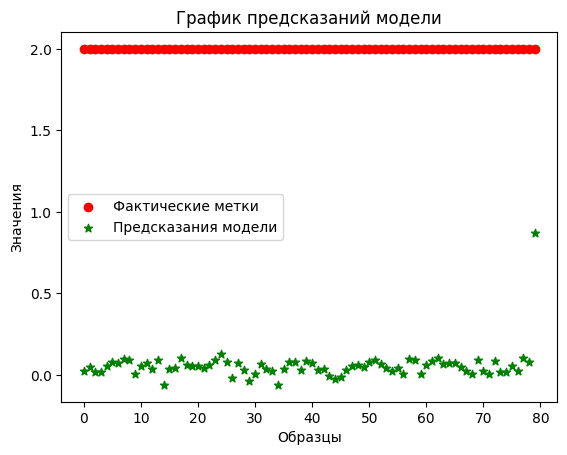

In [ ]:
# Визуализация предсказаний относительно меток

import matplotlib.pyplot as plt

# Предсказанные значения модели
#y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01,xTestSkillsVectors])
y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])

# Построение графика
plt.scatter(range(len(y_test)), y_test, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_test)), y_pred, c='green', marker='*', label='Предсказания модели')

plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказаний модели')
plt.legend()
plt.show()


In [ ]:
# посмотрим, как выглядит результат
test_dataset.head(80)

Пол, возраст            ЗП  \
0     Женщина, 34 года, родилась 4 марта 1988   90 000 руб.   
1     Женщина, 37 лет, родилась 3 января 1986    не указана   
2                                     Мужчина   35 000 руб.   
3     Женщина, 32 года, родилась 5 марта 1990   70 000 руб.   
4      Женщина, 25 лет, родилась 23 июня 1997   30 000 руб.   
..                                        ...           ...   
75    Мужчина, 42 года, родился 27 марта 1980  100 000 руб.   
76   Мужчина, 39 лет, родился 19 октября 1983   80 000 руб.   
77     Женщина, 38 лет, родилась 14 июля 1984    не указана   
78    Женщина, 29 лет, родилась 21 марта 1993    не указана   
79  Женщина, 24 года, родилась 27 апреля 1998   30 000 руб.   

                             Ищет работу на должность  \
0   Product Manager в команду Финансового департам...   
1                                     Project manager   
2                                     Project manager   
3                                     Project manager   
4                                     Project manager   
..                                                ...   
75                                    Project manager   
76                                    Project manager   
77  Product Manager в команду Финансового департам...   
78                       Product Manager в команду HR   
79                                      HR-специалист   

                                                Город  \
0   Уфа, Не готова к переезду, готова к редким ком...   
1   Уфа, Не готова к переезду, не готова к команди...   
2   Уфа, Готов к переезду, готов к редким командир...   
3   Уфа, Не готова к переезду, готова к командировкам   
4   Уфа, Готова к переезду, готова к редким команд...   
..                                                ...   
75    Уфа, Не готов к переезду, готов к командировкам   
76       Уфа, Готов к переезду, готов к командировкам   
77  Уфа, Не готова к переезду, готова к редким ком...   
78  Уфа, Хочу переехать: Австралия, Австрия, Ямайк...   
79  Уфа, Не готова к переезду, не готова к команди...   

                                            Занятость  \
0                                    полная занятость   
1                                    полная занятость   
2                                    полная занятость   
3                                    полная занятость   
4                                    полная занятость   
..                                                ...   
75                                   полная занятость   
76                                   полная занятость   
77                                   полная занятость   
78  проектная работа, стажировка, частичная занято...   
79                                   полная занятость   

                                               График  \
0                                         полный день   
1                                         полный день   
2          полный день, сменный график, гибкий график   
3                                         полный день   
4                                         полный день   
..                                                ...   
75                      удаленная работа, полный день   
76                                        полный день   
77       удаленная работа, гибкий график, полный день   
78  удаленная работа, гибкий график, полный день, ...   
79                                        полный день   

                          Опыт () Последнее/нынешное место работы  \
0   Опыт работы —16 лет 7 месяцев                Оптовая торговля   
1    Опыт работы —10 лет 2 месяца                         PLANETA   
2   Опыт работы —3 года 5 месяцев                          Восток   
3    Опыт работы —9 лет 6 месяцев                      Почта Банк   
4   Опыт работы —4 года 7 месяцев                 РОО СОП ШПВТ РБ   
..                            ...                             ...   
75  Опыт работы —12 лет 8 месяцев                    

Полученный файл CSV можно экспортировать для передачи Заказчику для тестирования результатов.

## Результаты проведенных работ и экспериментов


**Резюме. Выводы. Планы.**

1. До получения расширенного датасета от Заказчика, постороенная составная неросеть из трех веток обучается нормально и дает затребованную точность предсказаний на проверочной выборке выше 95%:
 - одна ветка обрабатывает простые категоризированные данные о соискателе;
 - одна ветка обрабатывает текстовые данные о последнем месте работы и должности соискателя;
 - одна ветка обрабатывает текстовые данные об образовании соискателя и законченном учебном заведении.

Предсказания обученной НС по "тестовой выборке" (составленной только из данных с метками Заказчика, но участвовавших в обучении НС), совпадают с категорией меток (да, подходит/нет, не подходит). Как и хотел Заказчик, предсказания имеют некое процентное выражение, соответствующее вероятности отнесения к классам “подходит” и “не подходит”. Результат предсказания записывается в дополнительное поле предоставленного Датасета и обогащенный датасет экспортируется в файл .CSV
(Результаты  в ноутбуке 6).

2. Использование дополнительной 4 ветки НС с обработкой текстовых данных только о навыках соискателя из дополненного Дататсета и игнорированием остальных данных изменило оценку обученной модели, но как оценить изменения - не понятно.

С позиции приближения результата оценки к крайним точкам принятых значений меток "да"/ "нет", результат (в среднем) стал лучше на 1,37%.  
НО данная метрика не кажется правильной т.к. в оценке заказчика да/нет отсутствует степень соответствия этим значениям, а считать их за 100%  - вряд ли правильно. Однако, к-либо другой точки отчета у нас нет.
(Результат в нутбуке 7)

3. Использование в добавленной 4 ветке обработки данных сразу двух новых полей "навыки" и "задачи" (тексты объеденены: к "навыкам" добавлены "задачи") снова изменило оценку обученной модели на тех же "тестовых данных".
Если использовать ту же логику сравнения, то результат стал хуже предыдущего, но все же - лучше изначального (до дополненного ДС). Улучшение снизилось до 0.54% (в среднем). т.е. разброс предсказаний относительно меток заказчика "да" и "нет", принятых за 100% стал больше. Тем не менее, все предсказания соответствуют категориям да/нет разметки Заказчика.
(Результат - в ноутбуке 8)

4. Вероятной причиной ухудшения предсказания является большая "замусоренность" поля "задачи". Гипотеза на проверку: если улучшить предобработку данного поля разными вариантами структуризации данных, результат, наверняка, возможно улучшить.

Другой стратегией может быть выделение обработки данных этого поля в отдельную 5 ветку составной нейросети. При этом возможно применить несколько отличную модель обработки текстовых данных (подобрать по результатам экспериментов).

5. В ноутбуке 9 была выполнена дополнительная предобработка текстовых полей "навыки" совместно с "задачи":
 - в обоих полях пустые значения заменены на слово "неизвестно";
 - значения полей объеденены в единый текст: к навыкам добавлена инфа по задачам;
 - очистка текста от интернет-ссылок, знаков, символов, майликов, нумерации разного вида, разделителей;
 - токинезация, лемматизация и удаление стоп-слов.
 Объединенный текст составил отдельную выборку, с которой обучалась отдельная ветка в составе составной.
 результат предсказаний на том же "тестовом" наборе данных ожидаемо показал результат не только лучше предыдущего, но и лучше варианта отдельной обработки навыков.

6. В ноутбуке (9_)применен вариант совместной обработки всех трех текстовых полей дополненного ДС одной нейронкой. Предобработка текста аналогична предыдущей. Результат предсказания обученной Нейросетки показал незначительное ухудшение относительно варианта без обработки текста.
Вывод: текст поля "О себе" нельзя совмещать с навыками и задачами в силу совершенно различной смысловой нагрузки.  Можно попытаться обработать его отдельной веткой составной неросети, как и видилось ранее.

7. В данном ноутбуке (10) вернулся к варианту совместной обработки данных полей "навыки" и "выполняемые задачи" отдельной четвертой веткой составной нейросети. Дополнительная 5-я ветка обрабатывает только текст поля "о себе", подвергнутого аналогичной предобработке. В результате полученое предсказание обновленной составной нейросети показало результаты лучше предыдущего варианта (когда все три поля обрабатываются одной веткой), что оправдывает вывод "о себе" в отдельную обработку, однако хуже варианта, когда содержание "о себе" вообще игнорируется.
Тем не менее, общий результат довольно приличный и позволяет использовать обработку всех полей дататсета 5 ветками в составе составной НС. Эту конструкцию и оставляю окончательным вариантом.

8. Выполненное предсказание обученной нейросети по неразмеченным Заказчиком строкам предоставленного Датасета показывает, что авторы всех 79 резюме не подходят работодателю. Степень неприемлимости различна, но все однозначно отнесены к категории "не подходит".
Если эти неразмеченные строки и представляют собой тестовый датасет, то результат представляется довольно странным, т.к. он означает, что Заказчик тестовые данные составил исключительно из резюме неподходящих соискателей, что кажется маловероятным, хоть и возможным.

Для проверки, в состав поданных для предсказаний неразмеченных Заказчиком данных включена дополнительная 80-я строка резюме, случайно выбранная из числа помеченных как "подходит", в которой предварительно удалена метка "да" (т.е. целевое поле  - тоже пустое).
В результате нового предсказания обученная НС уверенно определеила это 80-е резюме, как подходящее. Остальные  - все так же неподходящими.

Как бы то ни было, это - полученный в итоге результат. Он точно может быть улучшен за счет оптимизации параметров модели в каждой из 5 веток или даже использования альтернативных моделей обработки текстовых данных (потенциал к улучшению остался), но он уже не будет принципиально иным в примененной концепции построения нейросети.

Возможно, коцептуально иные варианты построения нейросети, обучаемой на таком скудном датасете, улучшат результативность ее предсказаний.

Однако, наиболее эффективным кажется путь увеличения датасета для обучения НС. Текущий датасет от заказчика слишком мал (всего 500 примеров, часть из которых  - повторно публикуемые резюме одних и тех же соискателей). Кроме того - он очень несбалансирован: доля одной из 2 категорий составляет лишь 2%. Это неприемлемо и требует исскуственных методов балансировки. Применен метод, при котором количество подходящих резюме увеличено продублированными экземплярами по-сути - копиями до количества, сопоставимого с количеством неподходящих. Это значительно улучшило обучаемость модели, но не может существенно повсить качество предсказаний, т.к. модель имеет дело не с новыми экземплярами данных, а копиями уже использованных в обучении.
